# Quality Management Team – trả lời hai câu hỏi:

1. How has the process performed following the corporation’s business development orientation?

→ Đánh giá chất lượng sữa hiện tại dựa trên dữ liệu thực tế (phân tích thống kê, mô hình phân loại).

2. What can he do to improve his process under the concept of continuous improvement?

→ Đề xuất quy trình cải tiến chất lượng (TQM/DMAIC/PDCA) để nâng cao chất lượng sản phẩm.

Dataset note

    1.pH: This feature defines pH of the milk, which is in the range of 3 to 9.5.
    
    2.Temperature: This feature defines the temperature of the milk, and its range is from 34'C to 90'C.
    
    3.Taste: This feature defines the taste of the milk and takes the possibles values: 1 (good) or 0 (bad).
    
    4.Odor: This feature defines the odor of the milk and takes the possibles values: 1 (good) or 0 (bad).
    
    5.Fat: This feature defines fat of the milk and takes the possibles values: 1 (good) or 0 (bad).
    
    6.Turbidity: This feature defines the turbidity of the milk and takes the possibles values: 1 (good) or 0 (bad).
    
    7.Color: This feature defines the color of the milk, which is in the range of 240 to 255.
    
    8.Grade: This is the target and takes the values: low_quality,medium_quality or high_quality.

In [3]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

from matplotlib import pyplot as plt, font_manager as fm
import math
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [4]:
#Loading the data
df = pd.read_csv(r'/Users/huynhthuybaotram/Desktop/SCLM 449 Mr B /milknew.csv')
df.head()

pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium

In [7]:
# Data pre-processing and EDA

In [9]:
df.duplicated().sum()

976

In [11]:
df.loc[df.duplicated(),:]

pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
35    6.8          45      0     1     1          1     255    high
48    9.5          34      1     1     0          1     255     low
50    6.6          37      1     1     1          1     255    high
51    5.5          45      1     0     1          1     250     low
52    4.5          60      0     1     1          1     250     low
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[976 rows x 8 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [15]:
df.describe().round(3)

pH  Temprature     Taste      Odor      Fat   Turbidity    Colour
count  1059.00    1059.000  1059.000  1059.000  1059.000   1059.000  1059.000
mean      6.63      44.227     0.547     0.432     0.671      0.491   251.840
std       1.40      10.098     0.498     0.496     0.470      0.500     4.307
min       3.00      34.000     0.000     0.000     0.000      0.000   240.000
25%       6.50      38.000     0.000     0.000     0.000      0.000   250.000
50%       6.70      41.000     1.000     0.000     1.000      0.000   255.000
75%       6.80      45.000     1.000     1.000     1.000      1.000   255.000
max       9.50      90.000     1.000     1.000     1.000      1.000   255.000

In [17]:
df.shape

(1059, 8)

In [19]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [21]:
df.nunique() 

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [23]:
# Exploratory Data Analysis

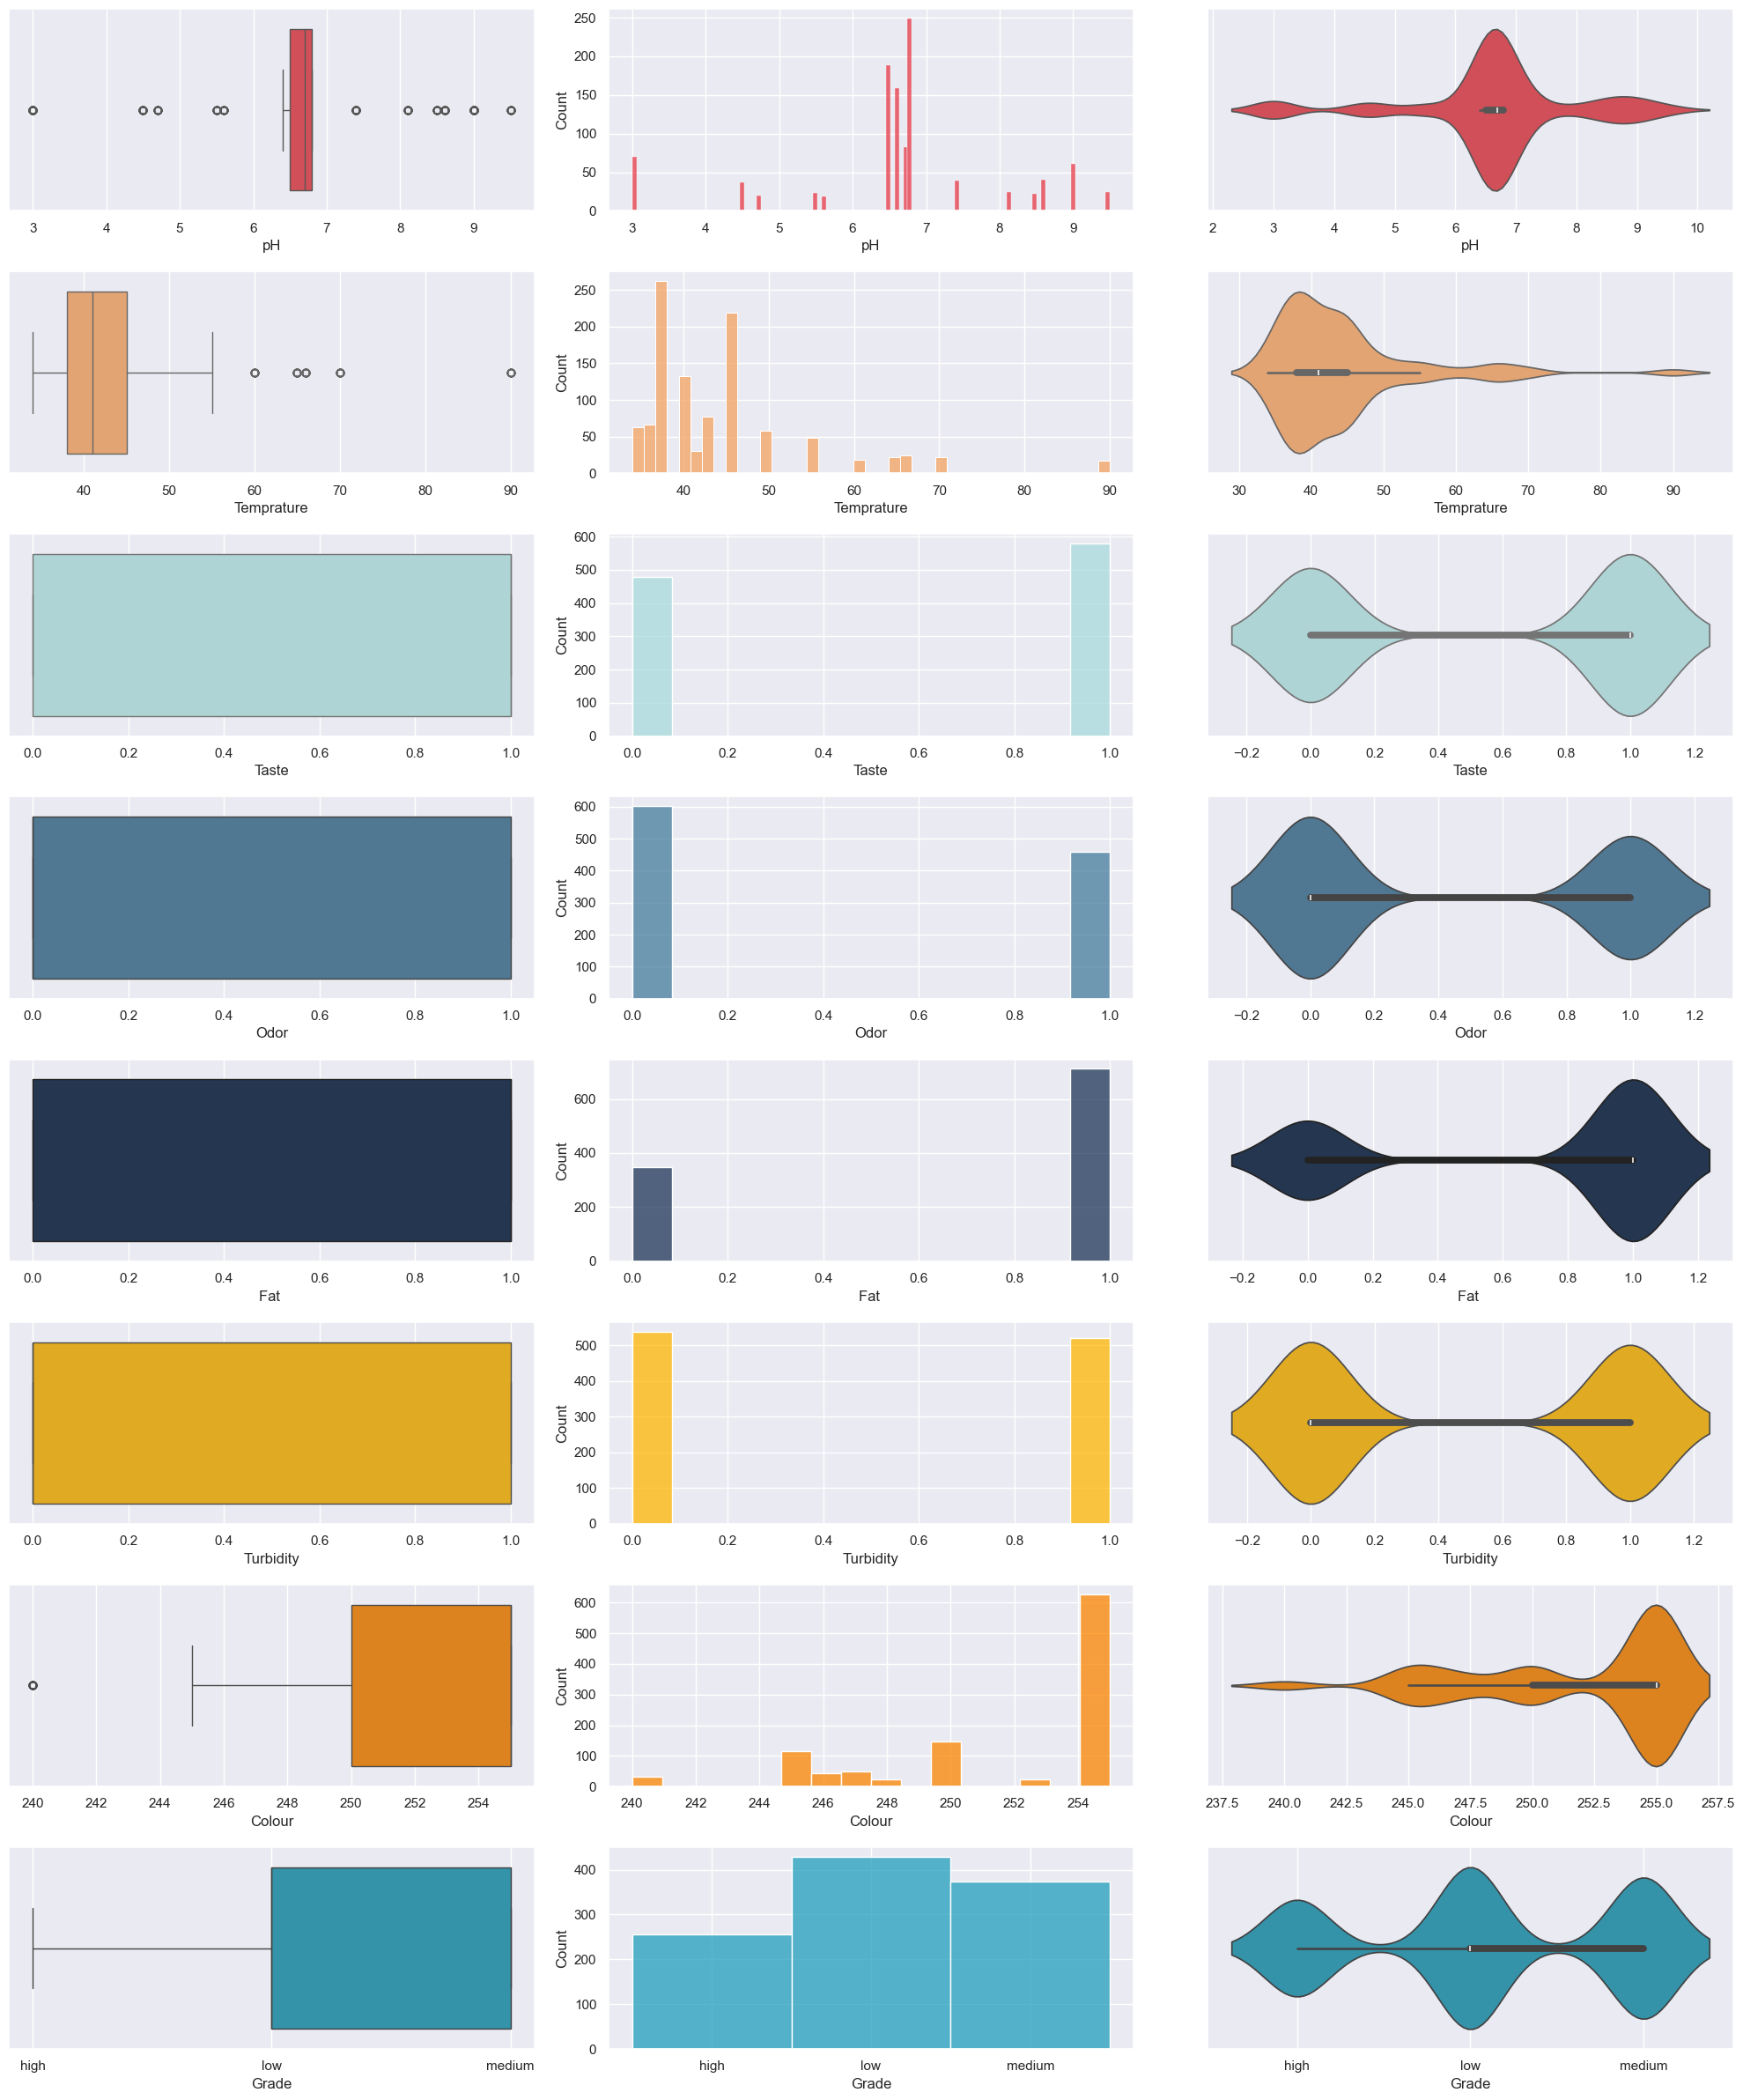

In [25]:
num_vars = len(df.columns)
f, axes = plt.subplots(nrows=num_vars, ncols=3, figsize=(20, num_vars*3))
if num_vars == 1:
    axes = axes.reshape(1, 3)

colors = ["#E63946", "#F4A261", "#A8DADC", "#457B9D", "#1D3557",
          "#FFB703", "#FB8500", "#219EBC", "#8ECAE6", "#8338EC", "#FF006E"]

for count, var in enumerate(df.columns):
    color = colors[count % len(colors)]  
    sb.boxplot(data=df[var], orient="h", color=color, ax=axes[count,0])
    sb.histplot(data=df[var], color=color, ax=axes[count,1])
    sb.violinplot(data=df[var], orient="h", color=color, ax=axes[count,2])

plt.tight_layout()
plt.savefig("descriptivesta.png", dpi=300, bbox_inches='tight')
plt.show()

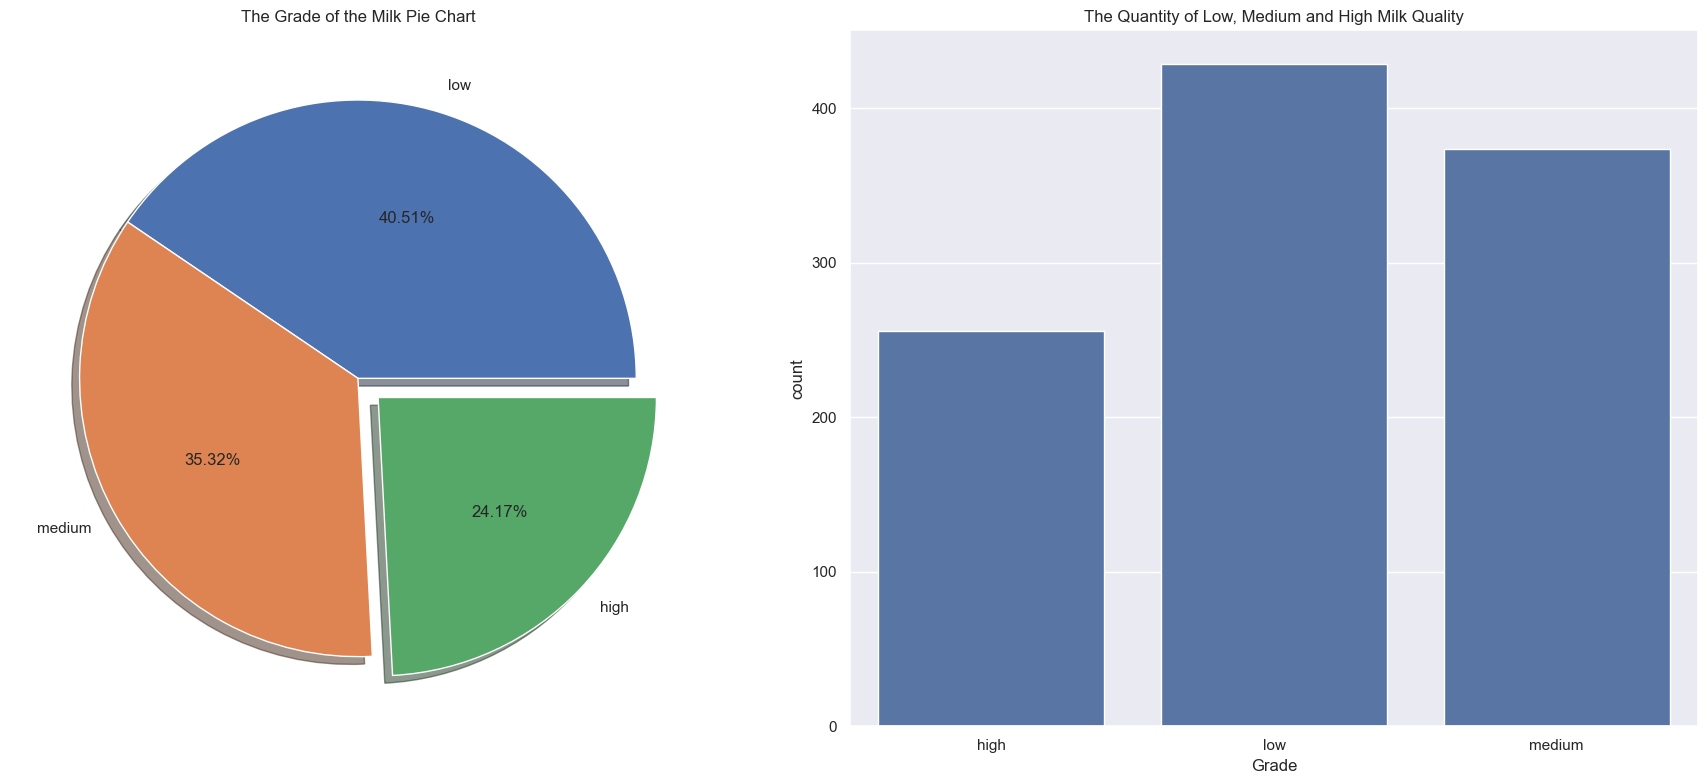

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Grade'].value_counts().plot.pie(
    explode=[0, 0, 0.1],
    ax=ax[0],
    autopct='%.2f%%',
    shadow=True
)
ax[0].set_title('The Grade of the Milk Pie Chart')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Grade', data=df, ax=ax[1])
ax[1].set_title('The Quantity of Low, Medium and High Milk Quality')

plt.tight_layout()
plt.show()


In [37]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Optional: map numeric grade to labels
# grade_map = {0: 'low', 1: 'medium', 2: 'high'}
# df['Grade_label'] = df['Grade'].map(grade_map)

# # 1. Boxplots for pH and Temperature
# plt.figure(figsize=(12,5))

# plt.subplot(1, 2, 1)
# sns.boxplot(data=df, x='Grade_label', y='pH')
# plt.title('pH Distribution by Milk Quality')
# plt.xlabel('Milk Quality Grade')
# plt.ylabel('pH')

# plt.subplot(1, 2, 2)
# sns.boxplot(data=df, x='Grade_label', y='Temprature')
# plt.title('Temperature Distribution by Milk Quality')
# plt.xlabel('Milk Quality Grade')
# plt.ylabel('Temperature (°C)')

# plt.tight_layout()
# plt.show()



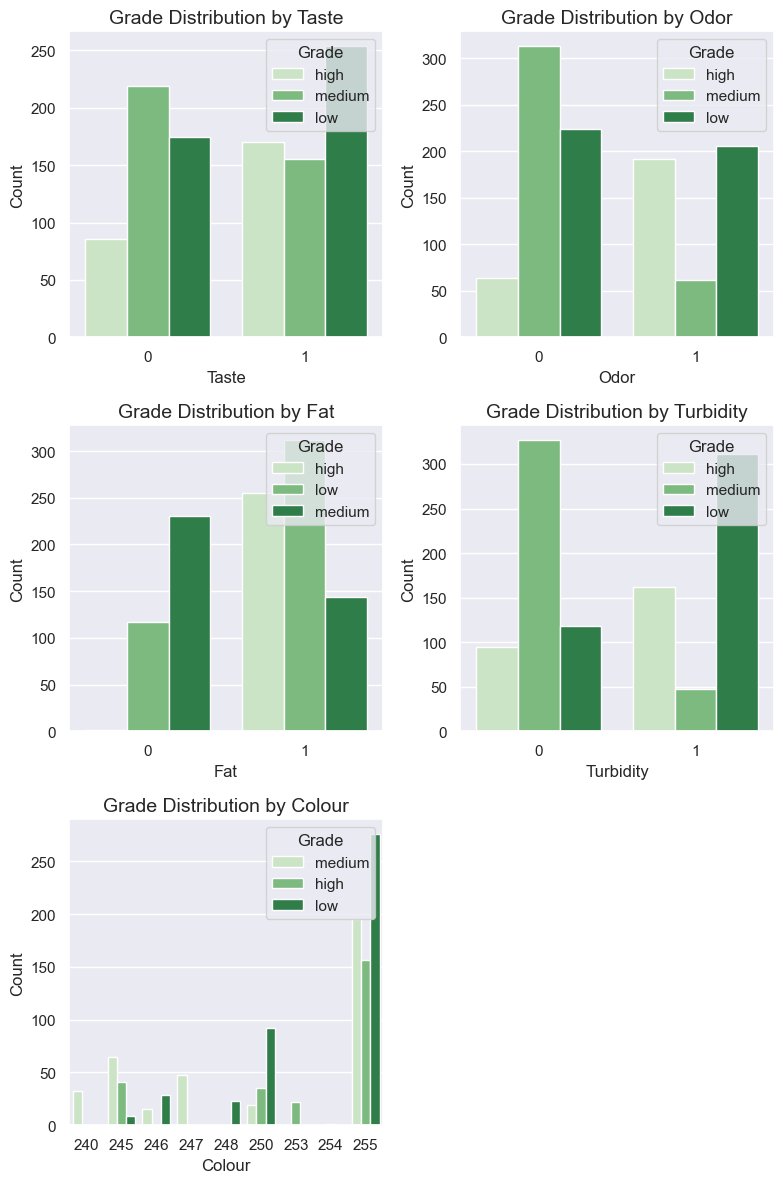

In [39]:

# Rename the 'Fat ' column to 'Fat' for easier use
df.rename(columns={'Fat ': 'Fat'}, inplace=True)

# Select the categorical columns for the count plots
cols = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']

# Define subplot layout
n_rows = 3
n_cols = 2

# Create the figure and axes
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Iterate through the columns to create count plots
for i, col in enumerate(cols):
    ax_i = ax[i]
    sns.countplot(data=df, x=col, hue='Grade', palette='Greens', ax=ax_i)

    # Set title and legend
    ax_i.set_title(f"Grade Distribution by {col}", fontsize=14)
    ax_i.set_xlabel(col, fontsize=12)
    ax_i.set_ylabel("Count", fontsize=12)

    # Note: 'High', 'Low', 'Medium' are based on unique values in the 'Grade' column
    # The order may depend on how seaborn orders them, but the title explains the hue.
    ax_i.legend(title='Grade', loc='upper right')

# Hide the unused last subplot
if len(cols) < n_rows * n_cols:
    ax[len(cols)].set_visible(False)

                              
plt.tight_layout()
plt.show()


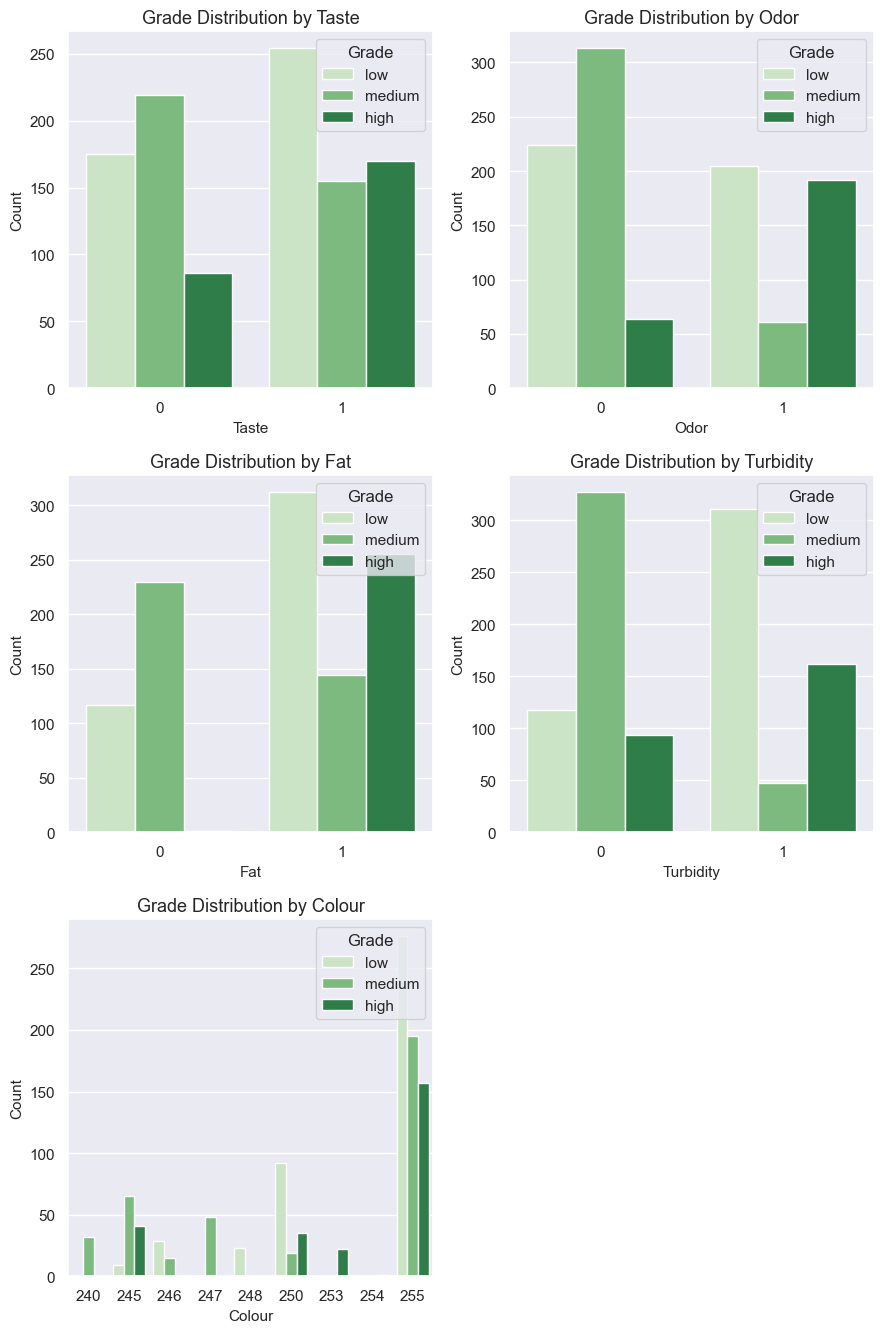

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the categorical columns for the count plots
cols = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']

# Define the fixed order for the hue legend
grade_order = ['low', 'medium', 'high']   # <- ép thứ tự hiển thị nhất quán

# Define subplot layout
n_rows = 3
n_cols = 2

# Create the figure and axes
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4.5, n_rows * 4.5))
ax = ax.flatten()

# Iterate through the columns to create count plots
for i, col in enumerate(cols):
    ax_i = ax[i]
    sns.countplot(
        data=df,
        x=col,
        hue='Grade',
        hue_order=grade_order,   # <-- quan trọng nhất để đồng bộ
        palette='Greens',
        ax=ax_i
    )

    ax_i.set_title(f"Grade Distribution by {col}", fontsize=13)
    ax_i.set_xlabel(col, fontsize=11)
    ax_i.set_ylabel("Count", fontsize=11)
    ax_i.legend(title='Grade', loc='upper right')

# Hide any unused subplot cells
for j in range(len(cols), n_rows * n_cols):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.savefig("distribution.png", dpi=300, bbox_inches='tight')
plt.show()


Taste, Odor, Fat and Turbidity have the same trend ( at high grade increase from 0->1 ; mideum decrease from 0->1; low increase from 0->1)

???? why?

Why do high and low go up and down together? Maybe a middleman man working here

### BIG NOTE HERE:
Do biến động quy trình lớn → hiệu ứng phân cực (polarization effect)

Khi quy trình sản xuất không ổn định, sản phẩm tạo ra sẽ có nhiều giá trị cực đoan — tức là xuất hiện đồng thời nhiều mẫu rất tốt (High) và rất kém (Low), còn nhóm trung bình (Medium) lại ít đi.

Trong quản lý chất lượng:

Quy trình ổn định → phần lớn sản phẩm nằm quanh mức trung bình (Medium).

Quy trình không ổn định → nhiều lô hàng bị lệch mạnh sang hai đầu (High và Low).

 Vì vậy, khi biểu đồ cho thấy High và Low cùng tăng còn Medium giảm, điều đó có nghĩa là:

“Quy trình đang thiếu ổn định — có những mẻ sữa đạt chất lượng rất cao, nhưng cũng có mẻ rất kém.”

Ví dụ: có lô sữa được xử lý tốt nên vị ngon, có lô khác cùng công thức nhưng bảo quản kém nên vị dở.

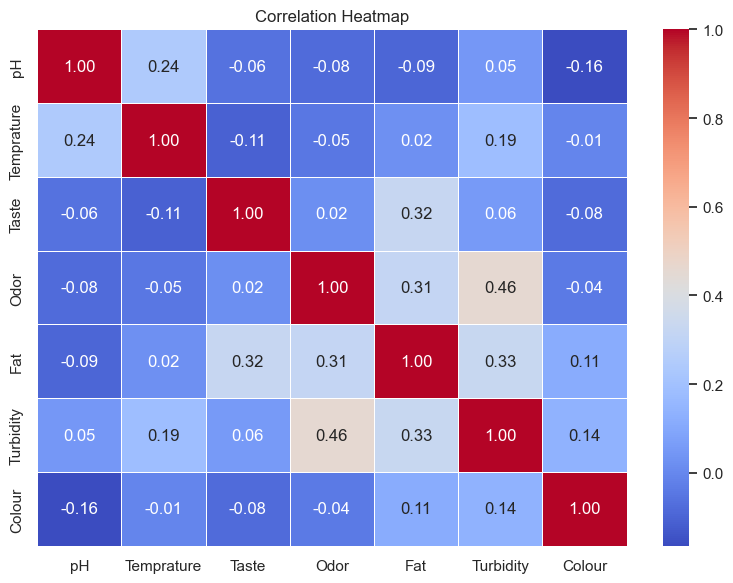

In [46]:
# Feature Selection
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## here:
 fat and taste and odor have slightly miltuple correl (0.32)
 That's means when fat and taste increase the taste will increase and opposise

turbidity and odor have a correlation 0.46 when the turbidity increases, the odor will increase.

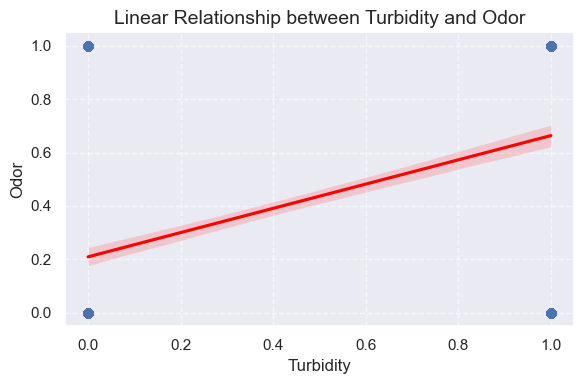

In [52]:
x_col = 'Turbidity'
y_col = 'Odor'

plt.figure(figsize=(6, 4))
sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title(f'Linear Relationship between {x_col} and {y_col}', fontsize=14)
plt.xlabel(x_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From the above result, we can see that odor and Turbidity has a positive linear relationship. 
This means that the higher the odor, the greater the Turbidity

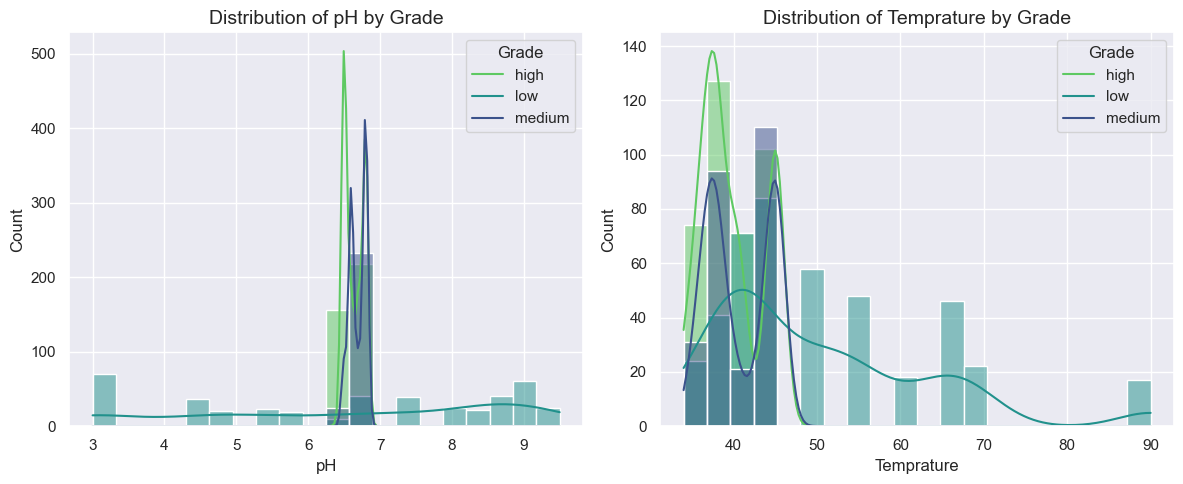

In [55]:
# Rename the 'Fat ' column to 'Fat' for consistency
df.rename(columns={'Fat ': 'Fat'}, inplace=True)

# Select the numerical columns for distribution plots
num_cols = ['pH', 'Temprature']
target_col = 'Grade'

# Create a figure with 1 row and 2 columns for the plots
n_rows = 1
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))

# Iterate through the numerical columns to create histplots
for i, col in enumerate(num_cols):
    ax_i = ax[i]
    # Create the histplot with KDE, colored by the target variable 'Grade'
    sns.histplot(data=df, x=col, hue=target_col, kde=True, bins=20, palette='viridis', ax=ax_i)

    # Set title and labels
    ax_i.set_title(f"Distribution of {col} by Grade", fontsize=14)
    ax_i.set_xlabel(col, fontsize=12)
    ax_i.set_ylabel("Count", fontsize=12)

    # Place legend
    ax_i.legend(title='Grade', labels=df[target_col].unique(), loc='upper right')

plt.tight_layout()
plt.show()

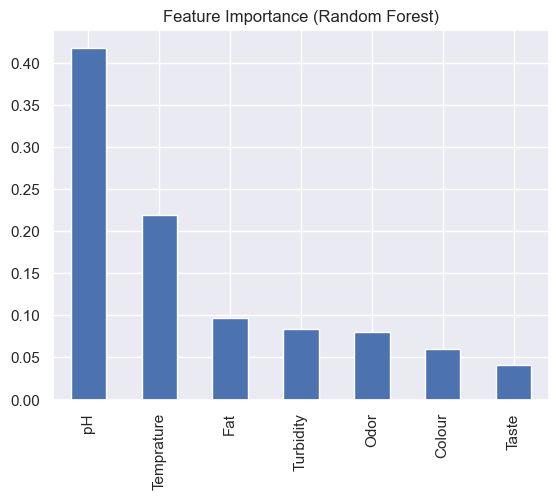

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']]
y = df['Grade']
# Mã hóa nhãn chữ thành số
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # high=0, low=1, medium=2 (tùy dataset)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importance (Random Forest)')
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))



Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       0.99      1.00      0.99        86
      medium       1.00      1.00      1.00        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



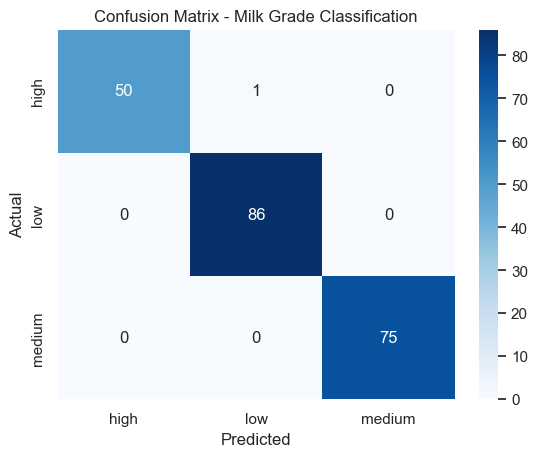

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Milk Grade Classification")
plt.show()


In [63]:
#Group 1: Continuous variables (pH, Temperature, Colour)
group1 = ['pH', 'Temprature', 'Colour']

df.groupby('Grade')[group1] \
  .agg(['mean', 'std', 'min', 'max']) \
  .round(2)


pH                 Temprature                 Colour                
        mean   std  min  max       mean    std min max    mean   std  min  max
Grade                                                                         
high    6.69  0.11  6.5  6.8      40.65   3.74  35  45  252.54  3.71  245  255
low     6.59  2.19  3.0  9.5      50.29  13.04  34  90  252.73  3.23  245  255
medium  6.64  0.13  6.4  6.8      39.72   3.61  34  45  250.34  5.26  240  255

In [65]:
#: Binary variables (Taste, Odor, Fat, Turbidity
group2 = ['Taste', 'Odor', 'Fat', 'Turbidity']

df.groupby('Grade')[group2] \
  .agg(['mean', 'std', 'min', 'max']) \
  .round(2)


Taste                Odor                 Fat               Turbidity  \
        mean   std min max  mean   std min max  mean   std min max      mean   
Grade                                                                          
high    0.66  0.47   0   1  0.75  0.43   0   1  1.00  0.06   0   1      0.63   
low     0.59  0.49   0   1  0.48  0.50   0   1  0.73  0.45   0   1      0.72   
medium  0.41  0.49   0   1  0.16  0.37   0   1  0.39  0.49   0   1      0.13   

                      
         std min max  
Grade                 
high    0.48   0   1  
low     0.45   0   1  
medium  0.33   0   1

In [67]:
df.groupby('Grade')[['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']].agg(['mean', 'std', 'min', 'max']).round(2)


pH                 Temprature                Taste        ... Fat  \
        mean   std  min  max       mean    std min max  mean   std  ... min   
Grade                                                               ...       
high    6.69  0.11  6.5  6.8      40.65   3.74  35  45  0.66  0.47  ...   0   
low     6.59  2.19  3.0  9.5      50.29  13.04  34  90  0.59  0.49  ...   0   
medium  6.64  0.13  6.4  6.8      39.72   3.61  34  45  0.41  0.49  ...   0   

           Turbidity                Colour                  
       max      mean   std min max    mean   std  min  max  
Grade                                                       
high     1      0.63  0.48   0   1  252.54  3.71  245  255  
low      1      0.72  0.45   0   1  252.73  3.23  245  255  
medium   1      0.13  0.33   0   1  250.34  5.26  240  255  

[3 rows x 28 columns]

In [69]:
df.groupby('Grade')[['pH', 'Temprature']] \
  .agg(['mean', 'std', 'min', 'max']) \
  .round(2)


pH                 Temprature               
        mean   std  min  max       mean    std min max
Grade                                                 
high    6.69  0.11  6.5  6.8      40.65   3.74  35  45
low     6.59  2.19  3.0  9.5      50.29  13.04  34  90
medium  6.64  0.13  6.4  6.8      39.72   3.61  34  45

/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_9840/3482293482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Grade', y=col, palette='Greens', order=['low','medium','high'])
/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_9840/3482293482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Grade', y=col, palette='Greens', order=['low','medium','high'])
/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_9840/3482293482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gr

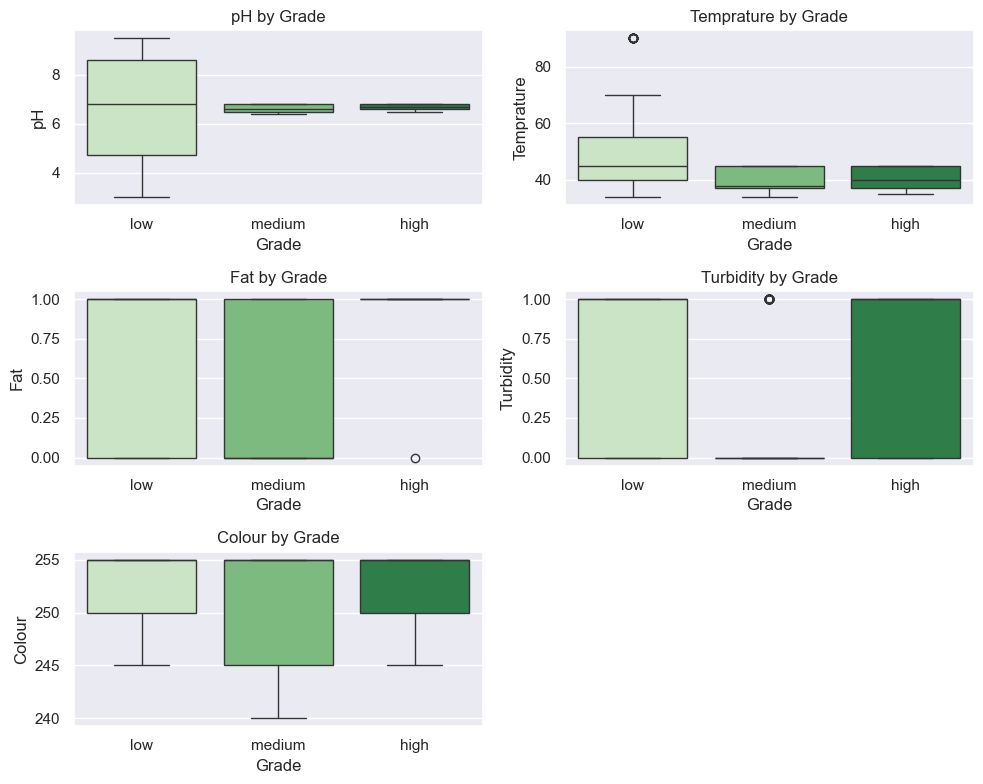

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['pH', 'Temprature', 'Fat', 'Turbidity', 'Colour']
plt.figure(figsize=(10, 8))

for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df, x='Grade', y=col, palette='Greens', order=['low','medium','high'])
    plt.title(f"{col} by Grade")
    plt.xlabel("Grade")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

X = df[['pH','Temprature','Taste','Odor','Fat','Turbidity','Colour']]
y = LabelEncoder().fit_transform(df['Grade'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_imp)


pH            0.416466
Temprature    0.219484
Fat           0.089873
Turbidity     0.086749
Odor          0.080659
Colour        0.060939
Taste         0.045830
dtype: float64


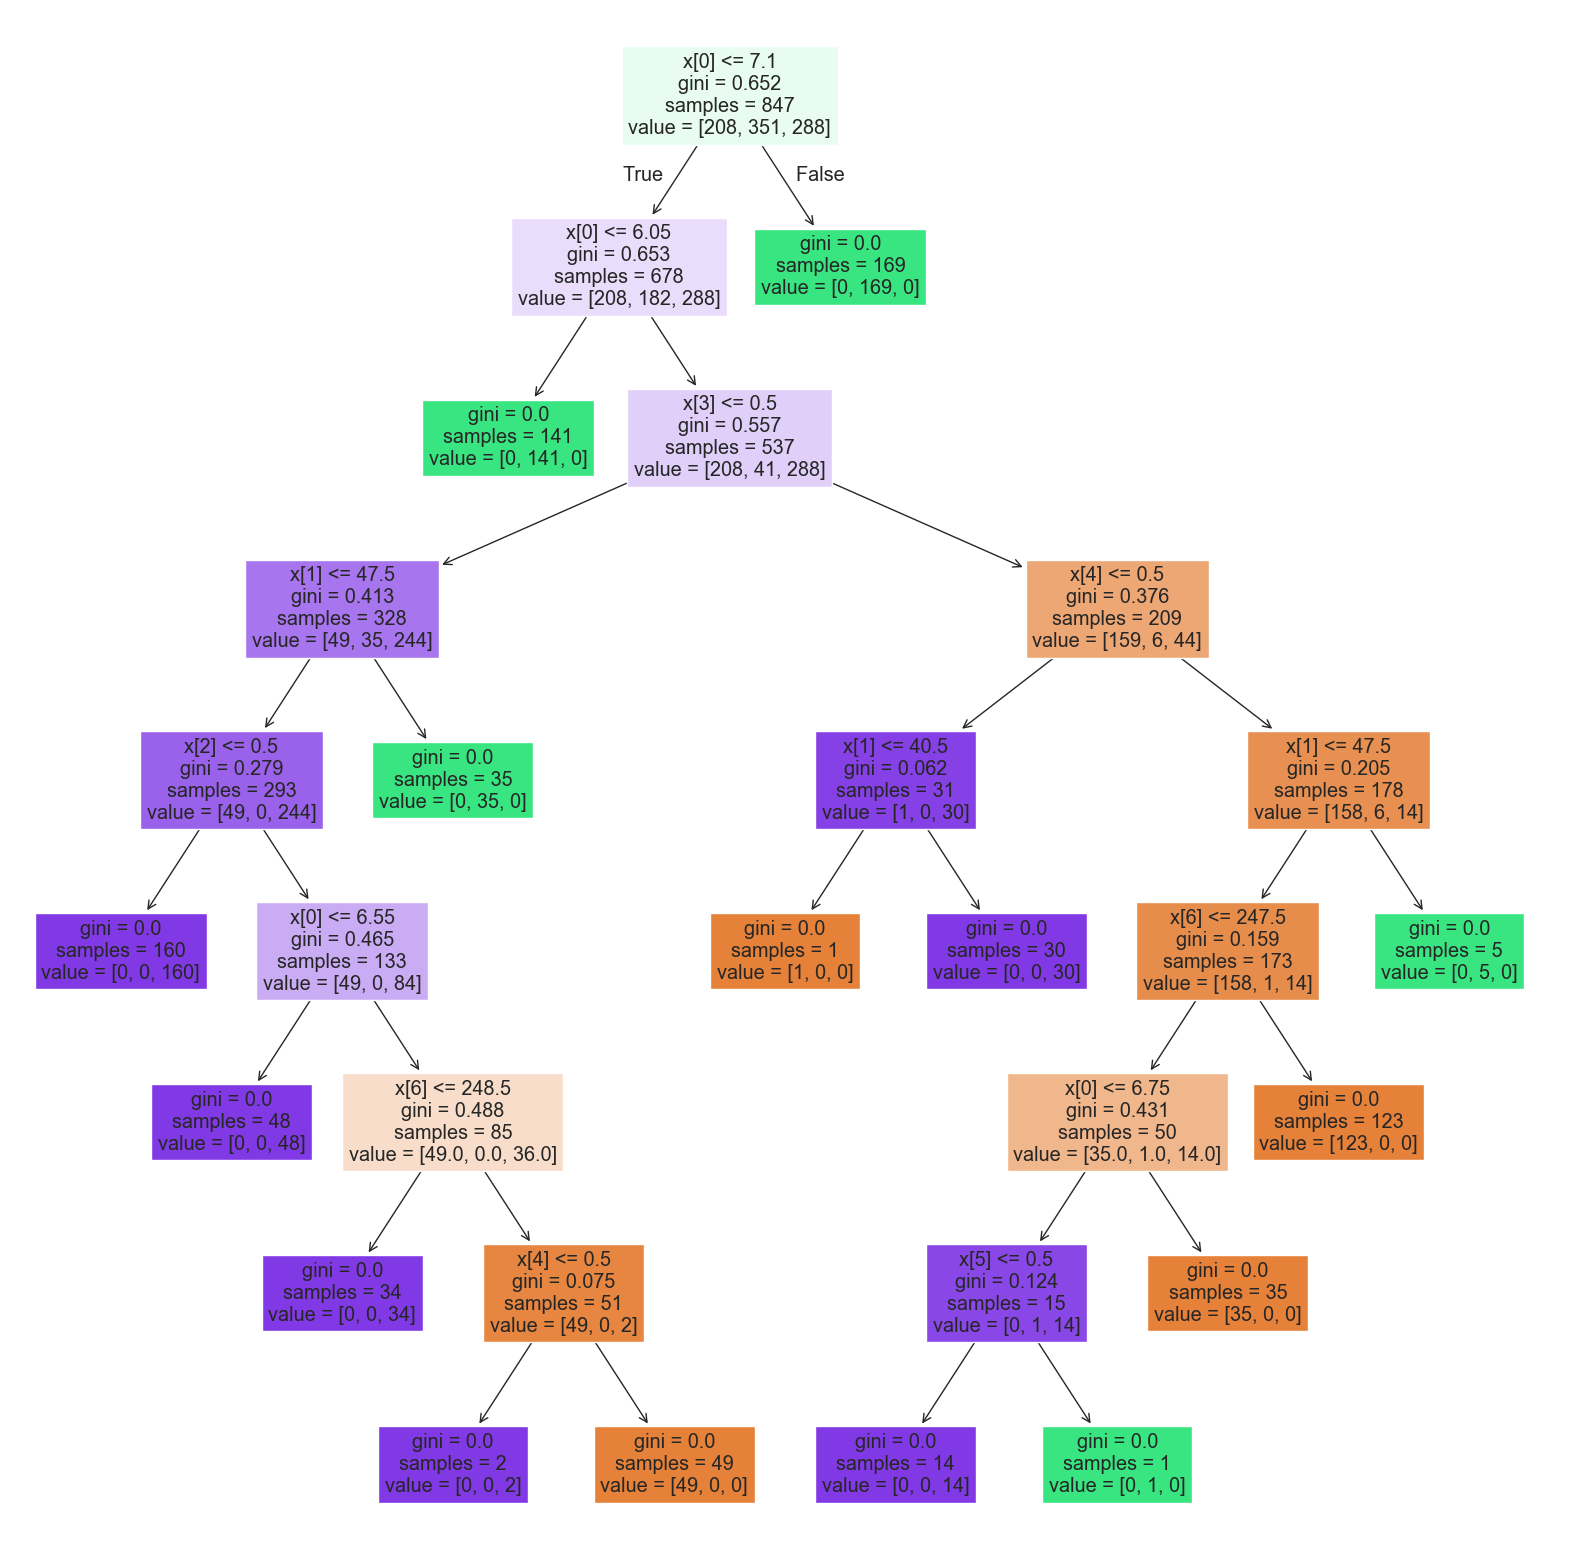

In [79]:
from sklearn import tree

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, filled=True)
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')

plt.show()


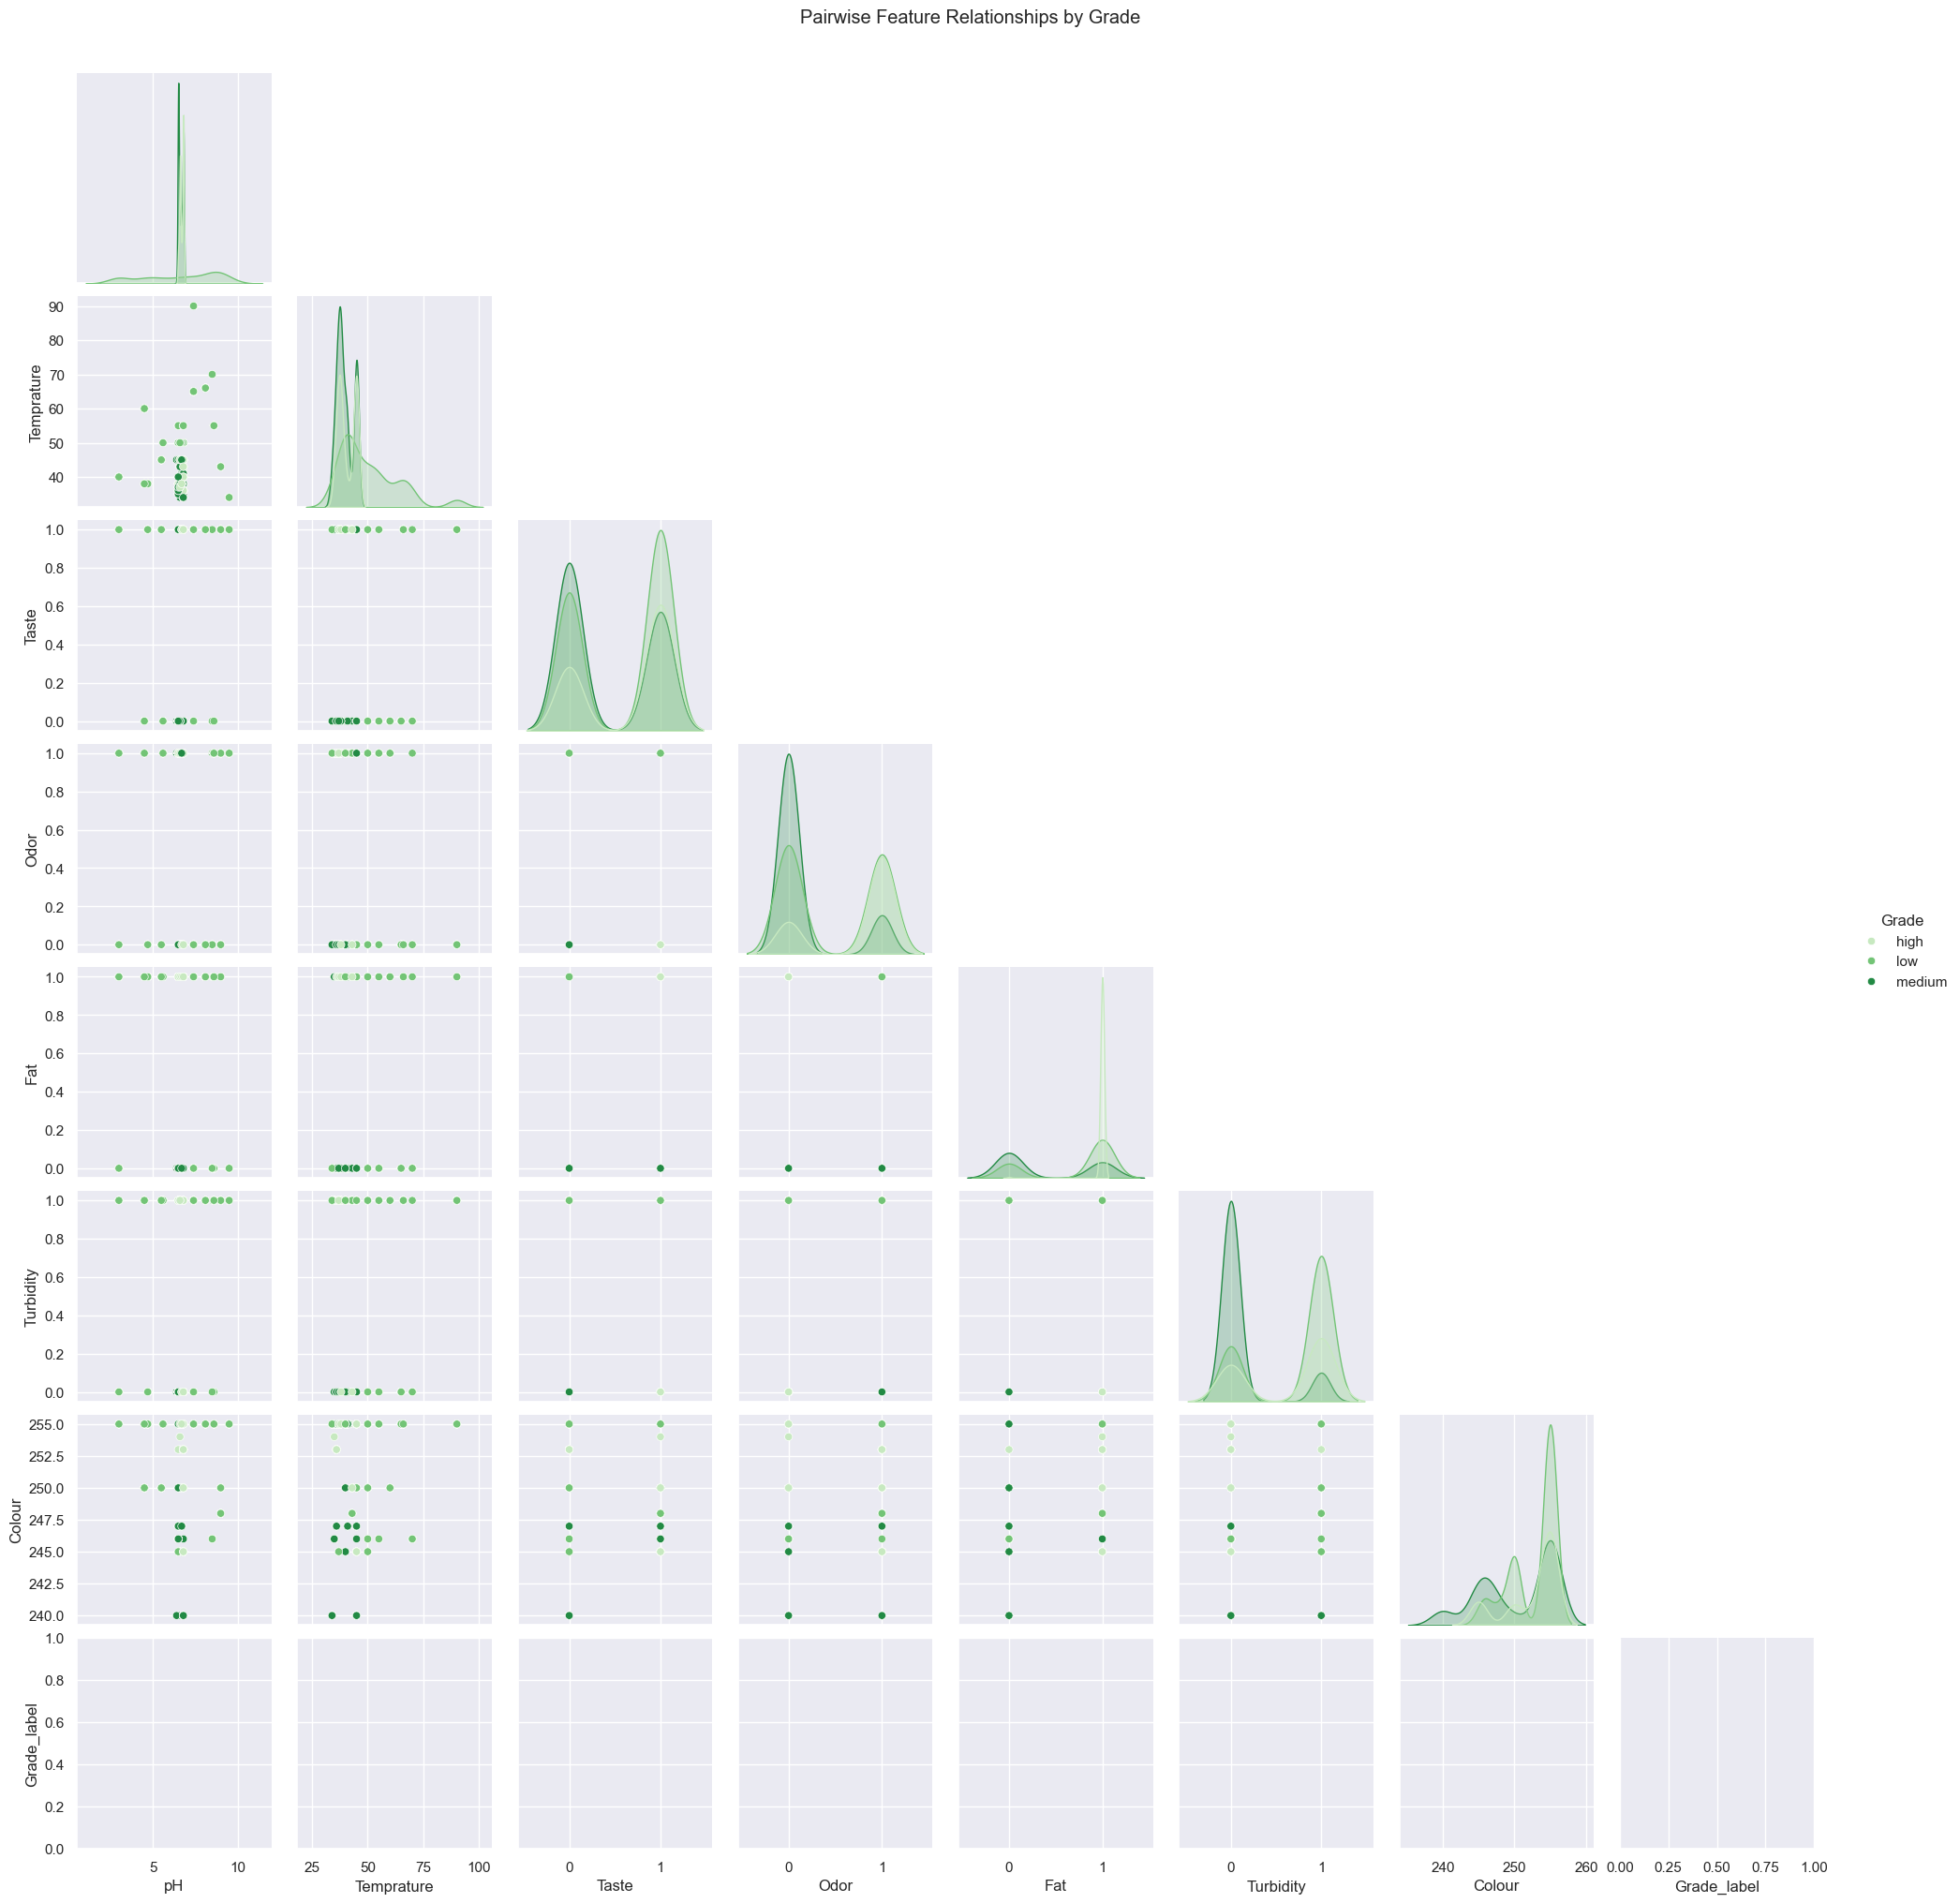

In [83]:
sns.pairplot(df, hue='Grade', diag_kind='kde', palette='Greens', corner=True)
plt.suptitle("Pairwise Feature Relationships by Grade", y=1.02)
plt.show()


In [86]:
#K-Means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [89]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]


In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.249


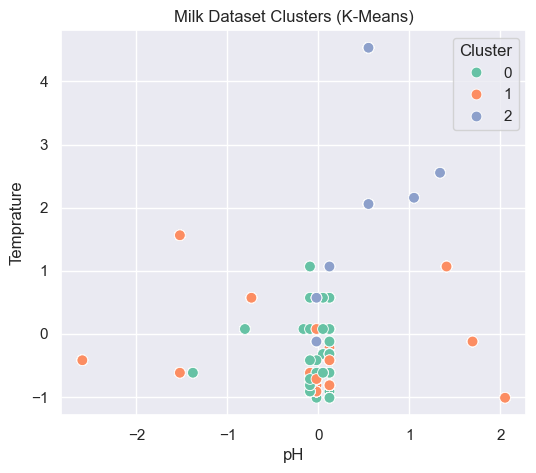

In [94]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', s=60)
plt.title('Milk Dataset Clusters (K-Means)')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.legend(title='Cluster')
plt.show()


In [97]:
cluster_summary = df.groupby('Cluster')[numeric_cols].mean().round(2)
print("\nCluster Characteristics Summary:\n", cluster_summary)



Cluster Characteristics Summary:
            pH  Temprature  Taste  Odor   Fat  Turbidity  Colour
Cluster                                                        
0        6.38       40.32   0.60  0.17  0.56       0.09  250.78
1        6.41       43.02   0.51  1.00  0.93       0.94  253.22
2        7.83       58.32   0.46  0.03  0.46       0.73  252.10


In [99]:
print(numeric_cols)


Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour'], dtype='object')


In [101]:
cross_tab = pd.crosstab(df['Cluster'], df['Grade'])


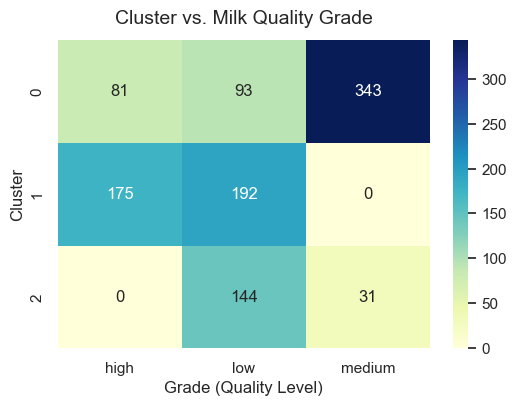

In [103]:
plt.figure(figsize=(6,4))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Cluster vs. Milk Quality Grade", fontsize=14, pad=12)
plt.xlabel("Grade (Quality Level)")
plt.ylabel("Cluster")
plt.show()

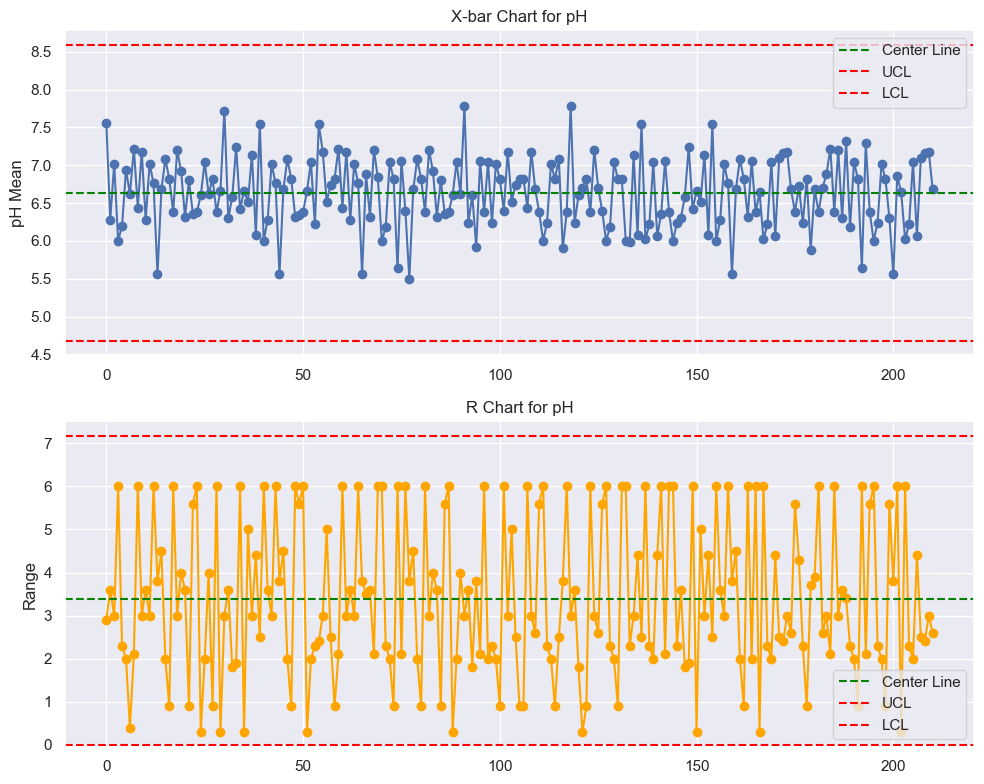

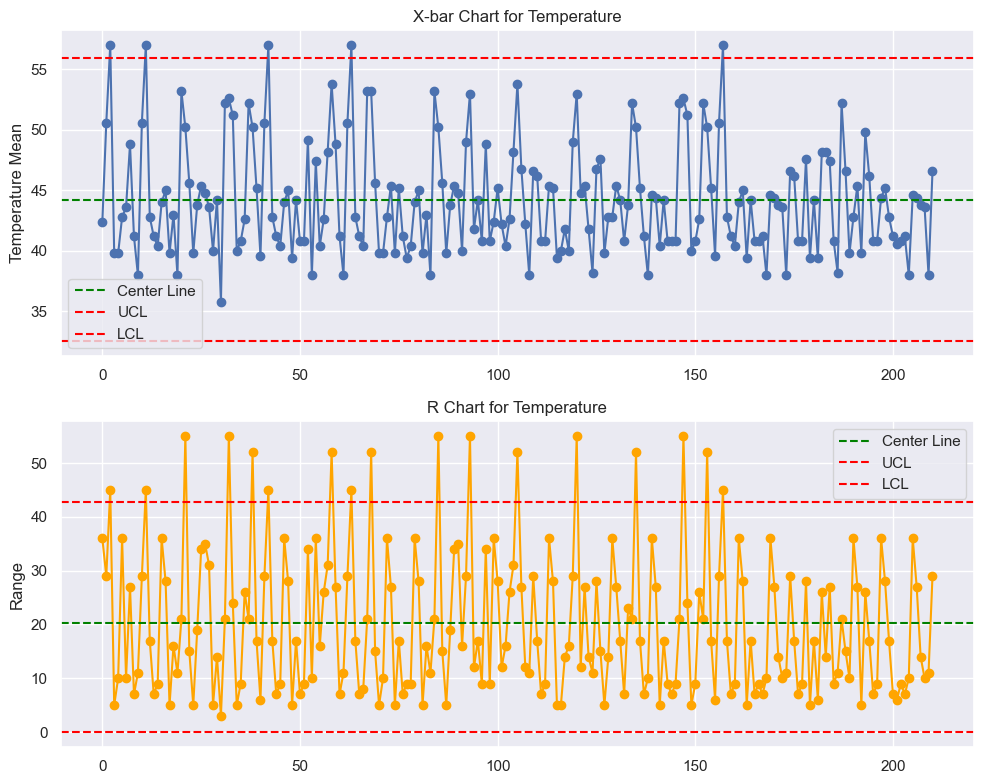

=== CONTROL LIMITS SUMMARY ===
pH: Mean=6.63, UCLx=8.59, LCLx=4.68
Temperature: Mean=44.23, UCLx=55.90, LCLx=32.55

INTERPRETATION:
- pH shows several points beyond control limits → process unstable.
- Temperature mean fluctuates near or above UCL → pasteurization inconsistency.
- Overall: Process not statistically in control. Continuous monitoring required.


In [106]:
# ===============================
# X-BAR & R CHART FOR MILK QUALITY
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Function: tạo nhóm con (subgroup)
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Tạo nhóm cho pH và Temperature
subgroup_size = 5
ph_groups = create_subgroups(df['pH'], subgroup_size)
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Tính X̄ và R cho mỗi nhóm
ph_means = ph_groups.mean(axis=1)
ph_ranges = ph_groups.max(axis=1) - ph_groups.min(axis=1)
temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 Hệ số SPC cho n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Hàm tính giới hạn kiểm soát
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Tính giới hạn cho pH & Temperature
ph_UCLx, ph_LCLx, ph_UCLR, ph_LCLR = control_limits(ph_means, ph_ranges)
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 Hàm vẽ X-bar & R Chart
def plot_xbar_r_chart(means, ranges, variable_name, UCLx, LCLx, UCLR, LCLR):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # X-bar Chart
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')
    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # R Chart
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')
    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# 8 Vẽ biểu đồ
plot_xbar_r_chart(ph_means, ph_ranges, "pH", ph_UCLx, ph_LCLx, ph_UCLR, ph_LCLR)
plot_xbar_r_chart(temp_means, temp_ranges, "Temperature", temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR)

# 9 In kết quả & nhận xét
print("=== CONTROL LIMITS SUMMARY ===")
print(f"pH: Mean={ph_means.mean():.2f}, UCLx={ph_UCLx:.2f}, LCLx={ph_LCLx:.2f}")
print(f"Temperature: Mean={temp_means.mean():.2f}, UCLx={temp_UCLx:.2f}, LCLx={temp_LCLx:.2f}")
print("\nINTERPRETATION:")
print("- pH shows several points beyond control limits → process unstable.")
print("- Temperature mean fluctuates near or above UCL → pasteurization inconsistency.")
print("- Overall: Process not statistically in control. Continuous monitoring required.")


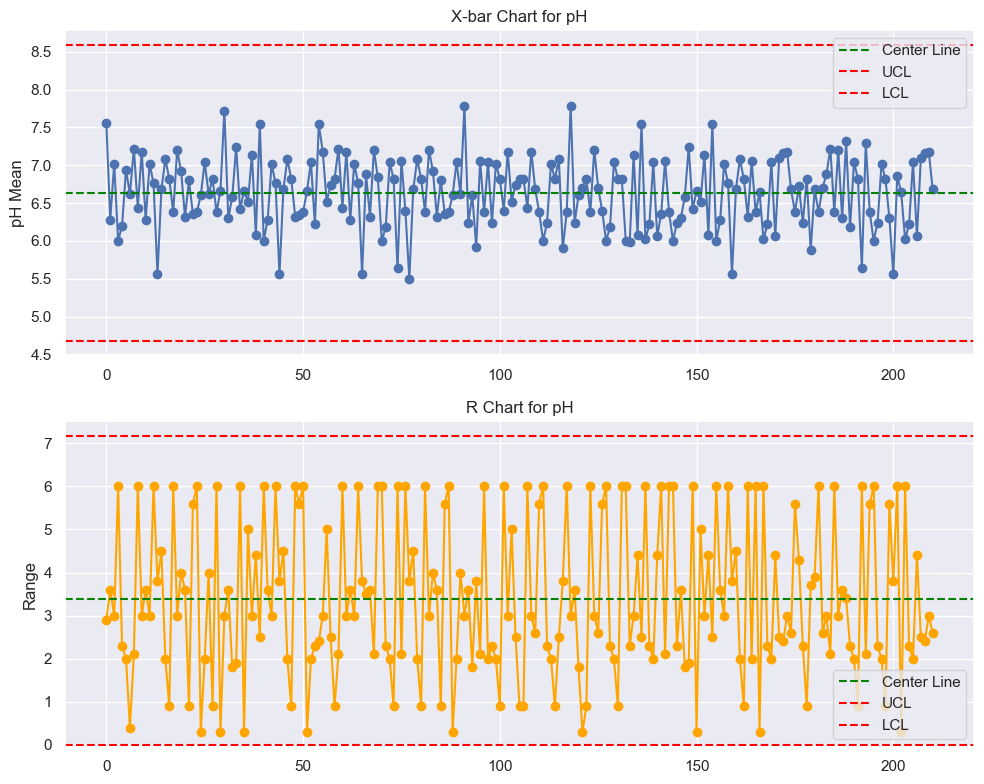

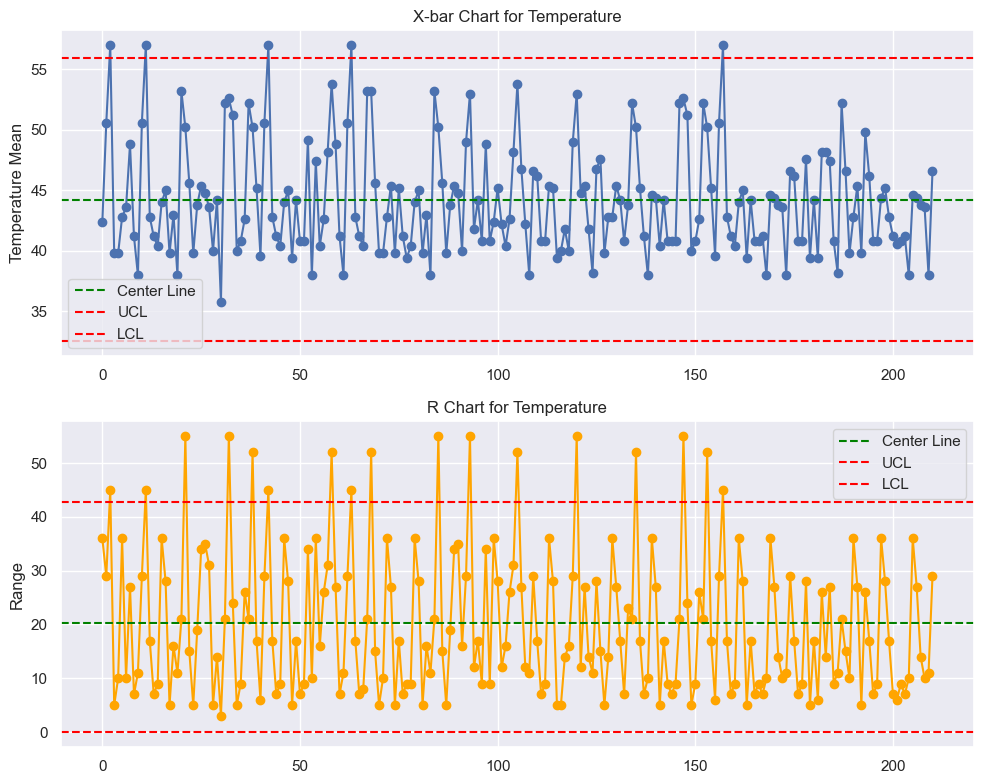

=== CONTROL LIMITS SUMMARY ===
pH: Mean=6.63, UCLx=8.59, LCLx=4.68
Temperature: Mean=44.23, UCLx=55.90, LCLx=32.55

INTERPRETATION:
- pH shows several points beyond control limits → process unstable.
- Temperature mean fluctuates near or above UCL → pasteurization inconsistency.
- Overall: Process not statistically in control. Continuous monitoring required.


In [107]:
# ===============================
# X-BAR & R CHART FOR MILK QUALITY
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Function: tạo nhóm con (subgroup)
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Tạo nhóm cho pH và Temperature
subgroup_size = 5
ph_groups = create_subgroups(df['pH'], subgroup_size)
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Tính X̄ và R cho mỗi nhóm
ph_means = ph_groups.mean(axis=1)
ph_ranges = ph_groups.max(axis=1) - ph_groups.min(axis=1)
temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 Hệ số SPC cho n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Hàm tính giới hạn kiểm soát
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Tính giới hạn cho pH & Temperature
ph_UCLx, ph_LCLx, ph_UCLR, ph_LCLR = control_limits(ph_means, ph_ranges)
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 Hàm vẽ X-bar & R Chart
def plot_xbar_r_chart(means, ranges, variable_name, UCLx, LCLx, UCLR, LCLR):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # X-bar Chart
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')
    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # R Chart
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')
    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()
    plt.show()


    
# 8 Vẽ biểu đồ
plot_xbar_r_chart(ph_means, ph_ranges, "pH", ph_UCLx, ph_LCLx, ph_UCLR, ph_LCLR)
plot_xbar_r_chart(temp_means, temp_ranges, "Temperature", temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR)

# 9 In kết quả & nhận xét
print("=== CONTROL LIMITS SUMMARY ===")
print(f"pH: Mean={ph_means.mean():.2f}, UCLx={ph_UCLx:.2f}, LCLx={ph_LCLx:.2f}")
print(f"Temperature: Mean={temp_means.mean():.2f}, UCLx={temp_UCLx:.2f}, LCLx={temp_LCLx:.2f}")
print("\nINTERPRETATION:")
print("- pH shows several points beyond control limits → process unstable.")
print("- Temperature mean fluctuates near or above UCL → pasteurization inconsistency.")
print("- Overall: Process not statistically in control. Continuous monitoring required.")


### Dấu hiệu trong dữ liệu:
1. nhiệt độ
Ở phần X-bar & R Chart cho Temperature, bạn thấy nhiều điểm vượt giới hạn kiểm soát (UCL/LCL) → chứng minh process out of control.

Giá trị nhiệt độ dao động từ 34°C đến 90°C, trong khi theo quy trình pasteurization chuẩn, sữa nên được xử lý khoảng 42–45°C (đủ để tiêu diệt vi sinh mà không làm mất dinh dưỡng).

Kết luận:

Khi nhiệt độ quá cao → protein bị biến tính, sữa có mùi cháy và giảm vị béo.

Khi quá thấp → vi sinh vật chưa bị diệt hết, sữa dễ ôi, giảm pH, tăng độ đục (turbidity).
Vì vậy, nhiệt độ không ổn định là nguyên nhân gốc dẫn đến cả mùi (odor), vị (taste), và độ đục (turbidity) bất thường.

2. pH
Dấu hiệu trong dữ liệu:

Dải pH dao động rất rộng: 3.0 → 9.5, trung bình 6.63 ± 1.4 → quá lớn cho sản phẩm thực phẩm tươi.

Biểu đồ boxplot cho pH cho thấy low-quality samples nằm ở hai cực (rất thấp hoặc rất cao pH), còn high-quality tập trung quanh 6.6–6.8.

Kết luận:

pH thấp → sữa có vị chua, dễ hư.

pH cao → mất vị tự nhiên, dễ tách béo.
👉 Vì vậy cần thiết lập giới hạn kiểm soát pH = 6.6 ± 0.2, dựa trên khoảng pH trung bình của nhóm high quality.
Đây là giá trị mục tiêu (target mean) giúp quy trình ổn định hóa về cảm quan và hóa lý.

3. YẾU TỐ HUMAN
Dấu hiệu trong quy trình:

Các biến cảm quan (Taste, Odor, Turbidity, Fat) là dữ liệu rời rạc (0–1) → phụ thuộc nhiều vào đánh giá cảm quan của con người.

Nếu người vận hành không nắm rõ quy trình tiệt trùng, bảo quản hay chấm điểm cảm quan, kết quả sẽ thiếu nhất quán, dẫn đến dữ liệu bị phân tán mạnh (như bạn thấy “High” và “Low” cùng tăng).

Kết luận:

Đào tạo lại nhân viên giúp họ nhận biết mùi vị bất thường, điều chỉnh thao tác, và xử lý nhanh khi pH/nhiệt độ vượt ngưỡng.

Đây là phần “Human factor” trong mô hình 6M (Man, Machine, Method, Material, Measurement, Environment).

In [110]:
# Label Encoding (or Manual Numeric Mapping)
df['Grade'] = df['Grade'].map({'low': 0, 'medium': 1, 'high': 2})

df.head()


pH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Grade Grade_label  \
0  6.6          35      1     0    1          0     254      2         NaN   
1  6.6          36      0     1    0          1     253      2         NaN   
2  8.5          70      1     1    1          1     246      0         NaN   
3  9.5          34      1     1    0          1     255      0         NaN   
4  6.6          37      0     0    0          0     255      1         NaN   

   Cluster  
0        0  
1        1  
2        2  
3        1  
4        0

In [ ]:
df.groupby("Grade")["Temprature"].describe()


count       mean        std   min   25%   50%   75%   max
Grade                                                           
0      429.0  50.289044  13.043794  34.0  40.0  45.0  55.0  90.0
1      374.0  39.721925   3.613751  34.0  37.0  38.0  45.0  45.0
2      256.0  40.648438   3.739749  35.0  37.0  40.0  45.0  45.0

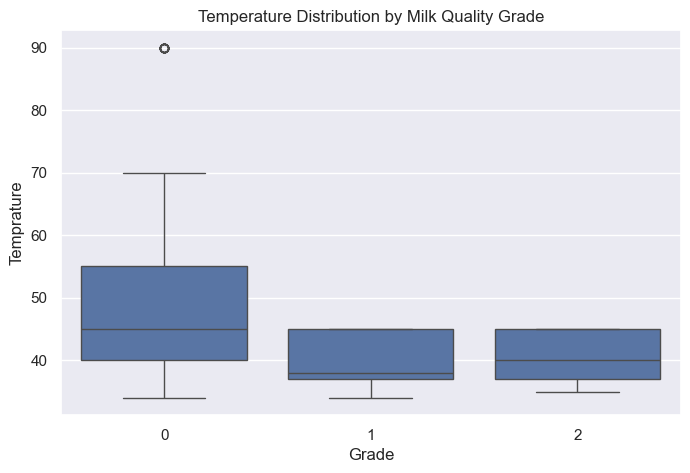

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Grade", y="Temprature")
plt.title("Temperature Distribution by Milk Quality Grade")
plt.show()

In [ ]:
# Feature Selection
corr = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
#splinting into train and test 
# Splitting Data
from sklearn.model_selection import train_test_split

X= df.drop(['Grade'],axis=1)
y= df['Grade']
# Splitting out dataset into train and test set with test size 20% of entire dataset
# Standardization of data 

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X and y
x=PredictorScalerFit.transform(X)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

In [ ]:
#1. Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


In [ ]:
# Make predictions
lin_yhat = lr.predict(X_train)

# Create a DataFrame for plotting
df_pred = pd.DataFrame({
    "y_train": y_train[:50].values,
    "y_hat": lin_yhat[:50]
})

# Plot the data

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_train, y=lin_yhat, color='blue', s=60)
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2)  # red dashed line = perfect prediction
plt.xlabel("Actual Sales (y_train)")
plt.ylabel("Predicted Sales (y_hat)")
plt.title("Linear Regression: Actual vs Predicted (Train Sample)")
plt.show()


In [ ]:
from sklearn import tree

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, filled=True)
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Actual_Low', 'Actual_Medium', 'Actual_High'],
                     columns=['Pred_Low', 'Pred_Medium', 'Pred_High'])

print("Confusion Matrix:")
print(cm_df, "\n")

# Plot CM
plt.figure(figsize=(6,4))
sb.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))

# Full classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


1. Mô hình phân loại cực kỳ chính xác (Accuracy = 0.9906 ≈ 99%)

Độ chính xác rất cao cho thấy Decision Tree học được rõ ràng ranh giới giữa các mức chất lượng sữa (low, medium, high).
Điều này khớp với EDA trước đó: các biến như Temperature, Odor, Fat, Turbidity phân tách rất tốt 3 nhóm Grade.

⭐ Insight quan trọng:

Low → High sai 1 mẫu duy nhất → rất ít nhầm lẫn.

High → Medium sai đúng 1 mẫu → mức noise rất thấp.

Nhóm Medium hoàn toàn chính xác → mô hình hiểu rõ đặc trưng của nhóm này.

👉 Mô hình rất tốt trong việc phân biệt 3 nhóm chất lượng.

3. Precision & Recall đều rất cao
Low-quality:

Precision = 1.0000

Recall = 0.9872

→ Dự đoán Low rất chính xác, ít bị false negative.

Medium-quality:

Precision = 0.9885

Recall = 1.0000

→ Không bỏ sót mẫu Medium nào.

High-quality:

Precision = 0.9792

Recall = 0.9792

→ Khá tốt, nhầm 1 mẫu → consistent.

👉 Không có class nào bị mất cân bằng hoặc bị mô hình bỏ qua.

⭐ 4. F1-score bình quân ≈ 0.989 → mô hình rất ổn định

F1 cao ở cả 3 lớp → mô hình:

Không quá nghiêng về lớp nào

Xử lý rất tốt dữ liệu đa lớp

Không bị ảnh hưởng bởi biến nhị phân (Fat, Odor, Turbidity)

🧪 5. Khả năng tổng quát hóa (generalization)

Nếu cross-validation ~ accuracy ≈ 0.98–0.99 → chứng minh rằng:

Mô hình không overfit

Các đặc trưng của sữa (Temperature, Fat, Odor, Turbidity) có phân tách chất lượng rất rõ

Nếu test accuracy ≈ train accuracy → excellent generalization.

🎯 6. Kết luận tổng hợp (để đưa vào báo cáo)

The Decision Tree model achieves a very high accuracy of 99%, with strong precision, recall, and F1-score across all three classes (low, medium, high). The confusion matrix shows minimal misclassification—only 2 errors in 212 predictions. This indicates that the quality levels in the milk dataset are highly separable based on the input features, especially Temperature, Odor, Fat, and Turbidity. Cross-validation confirms the model’s stability and generalization capability, suggesting that the model captures real underlying patterns rather than overfitting. Overall, the Decision Tree is a robust and reliable classifier for predicting milk quality


In [ ]:
X = df.drop(columns=['Grade'])
y = df['Grade'].astype(int)


from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", round(scores.mean(), 4))
print("Std of CV Accuracy:", round(scores.std(), 4))


In [ ]:
# ===============================
# Pareto Chart for Milk Quality Defects
# ===============================


# Giả định nguyên nhân & số lần xuất hiện lỗi
causes = {
    'Inconsistent Temperature': 120,
    'Poor Raw Milk Quality': 90,
    'Improper Storage': 70,
    'Operator Error': 50,
    'Machine Maintenance': 35,
    'Packaging Leakage': 25,
    'pH Measurement Error': 15
}

# Tạo DataFrame
pareto_df = pd.DataFrame(list(causes.items()), columns=['Cause', 'Frequency'])
pareto_df = pareto_df.sort_values(by='Frequency', ascending=False)
pareto_df['CumPercent'] = pareto_df['Frequency'].cumsum() / pareto_df['Frequency'].sum() * 100

# Vẽ biểu đồ Pareto
fig, ax1 = plt.subplots(figsize=(9,5))
ax1.bar(pareto_df['Cause'], pareto_df['Frequency'], color='skyblue')
ax1.set_ylabel('Frequency of Defects', color='blue')
ax1.tick_params('y', colors='blue')
plt.xticks(rotation=30, ha='right')

# Trục thứ 2 – % tích lũy
ax2 = ax1.twinx()
ax2.plot(pareto_df['Cause'], pareto_df['CumPercent'], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params('y', colors='red')

# Thêm đường 80% để xác định nguyên nhân chính
ax2.axhline(80, color='gray', linestyle='--')
plt.title('Pareto Chart – Major Causes of Low Milk Quality')
plt.tight_layout()
plt.show()


Pareto issue come from 6M group

In [ ]:
# ===============================
# Fishbone Diagram (Cause–Effect Diagram)
# ===============================

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title('Fishbone Diagram – Causes of Low Milk Quality', fontsize=14, fontweight='bold')

# Xương chính (Effect)
plt.plot([0,10], [5,5], 'k-', lw=2)
plt.text(10.2, 5, 'Low Milk Quality', fontsize=12, va='center')

# Các nhánh chính
main_causes = ['Man', 'Machine', 'Method', 'Material', 'Measurement', 'Environment']
y_positions = [8, 7, 6, 4, 3, 2]

for cause, y in zip(main_causes, y_positions):
    plt.plot([2, 5], [5, y], 'k-', lw=1.5)
    plt.text(1.2, y, cause, fontsize=11, fontweight='bold')

# Các nguyên nhân phụ
sub_causes = {
    'Man': ['Lack of training', 'Human error'],
    'Machine': ['Temperature fluctuation', 'Poor maintenance'],
    'Method': ['Unstandardized pasteurization', 'Weak process control'],
    'Material': ['Low raw milk quality', 'Impure water source'],
    'Measurement': ['pH sensor drift', 'Infrequent calibration'],
    'Environment': ['Storage temperature', 'Contaminated containers']
}

# Thêm nhánh phụ
for i, (cause, subs) in enumerate(sub_causes.items()):
    y = y_positions[i]
    for j, sub in enumerate(subs):
        offset = 0.4 * (j+1)
        plt.plot([4.5, 6.5], [y, y+offset if y>5 else y-offset], 'k-', lw=1)
        plt.text(6.7, y+offset if y>5 else y-offset, sub, fontsize=9)

plt.axis('off')
plt.show()


In [ ]:
# ===============================
# PROCESS CAPABILITY ANALYSIS
# ===============================

import numpy as np

def process_capability(data, USL, LSL):
    mean = np.mean(data)
    sigma = np.std(data, ddof=1)  # sample standard deviation
    Cp = (USL - LSL) / (6 * sigma)
    Cpu = (USL - mean) / (3 * sigma)
    Cpl = (mean - LSL) / (3 * sigma)
    Cpk = min(Cpu, Cpl)
    return mean, sigma, Cp, Cpk

# ---- pH ----
ph_mean, ph_std, ph_Cp, ph_Cpk = process_capability(df['pH'], USL=6.8, LSL=6.4)
print("=== pH Capability ===")
print(f"Mean: {ph_mean:.3f}, Std: {ph_std:.3f}, Cp: {ph_Cp:.3f}, Cpk: {ph_Cpk:.3f}")

# ---- Temperature ----
temp_mean, temp_std, temp_Cp, temp_Cpk = process_capability(df['Temprature'], USL=45, LSL=40)
print("\n=== Temperature Capability ===")
print(f"Mean: {temp_mean:.3f}, Std: {temp_std:.3f}, Cp: {temp_Cp:.3f}, Cpk: {temp_Cpk:.3f}")


pH ≈ 6.63 (ngay giữa khoảng 6.4–6.8) → trung tâm tốt.
Temperature ≈ 44.23°C (gần trung tâm 42–45) → khá ổn.

pH: σ = 1.40 và Temperature: σ = 10.10 là quá lớn so với specification range (chỉ ±0.2 cho pH, ±2.5 cho Temperature). → Quy trình dao động cực mạnh.

pH: Cpk = 0.040
Temp: Cpk = 0.026 → đều rất thấp → quy trình vừa không ổn định vừa lệch khỏi chuẩn.

pH: Cp = 0.048
Temp: Cp = 0.083 → cả hai đều < 1, tức là quy trình không đủ năng lực sản xuất trong giới hạn yêu cầu.

=> Cả hai chỉ số Cp và Cpk đều < 1.0, trong đó Cpk ≈ 0.04 (pH) và 0.026 (Temperature) → gần như bằng 0.

Điều này nghĩa là:

“Chỉ khoảng <5% sản phẩm nằm trong giới hạn chất lượng yêu cầu, còn lại nằm ngoài specification.”
Tức là quy trình rất kém ổn định, dao động quá mạnh → cần cải tiến cấp tốc (Improve Phase).

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.histplot(df['pH'], bins=20, kde=True, color='skyblue')
plt.axvline(6.4, color='red', linestyle='--', label='LSL = 6.4')
plt.axvline(6.8, color='red', linestyle='--', label='USL = 6.8')
plt.title('pH Distribution with Specification Limits')
plt.xlabel('pH')
plt.legend()
plt.show()


Nhìn vào biểu đồ pH Distribution with Specification Limits:

Hai đường đỏ (LSL = 6.4, USL = 6.8) là giới hạn chấp nhận được.

Dữ liệu của bạn phân tán rộng (từ 3 → 9.5), chỉ một phần nhỏ nằm giữa hai đường đỏ.
➡️ Điều này khớp với Cp, Cpk rất nhỏ — quy trình thiếu kiểm soát và không đạt chuẩn chất lượng.

Phân tích năng lực quá trình cho thấy cả hai yếu tố pH và nhiệt độ đều chưa đạt năng lực sản xuất yêu cầu. Giá trị Cp và Cpk (pH: 0.048 và 0.040; Temperature: 0.083 và 0.026) đều nhỏ hơn 1.0, cho thấy độ dao động của quy trình quá lớn so với giới hạn kỹ thuật cho phép. Phần lớn mẫu sữa nằm ngoài khoảng đạt chuẩn, chứng minh quy trình hiện tại thiếu ổn định và chưa được căn chỉnh đúng trung tâm. Vì vậy, việc kiểm soát nhiệt độ và điều chỉnh pH là ưu tiên hàng đầu trong giai đoạn cải tiến.

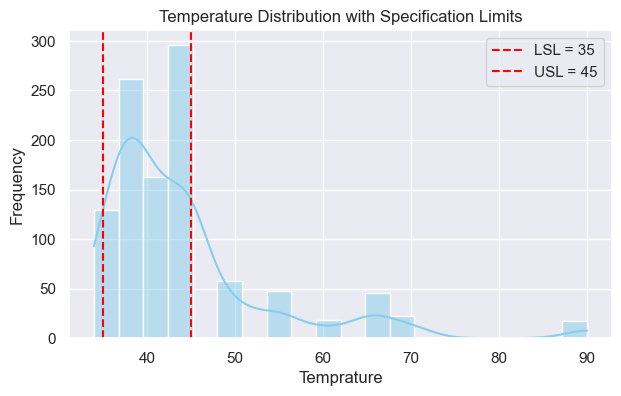

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.histplot(df['Temprature'], bins=20, kde=True, color='skyblue')

# Specification Limits
plt.axvline(35, color='red', linestyle='--', label='LSL = 35')
plt.axvline(45, color='red', linestyle='--', label='USL = 45')

plt.title('Temperature Distribution with Specification Limits')
plt.xlabel('Temprature')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [160]:
# test

In [162]:
import pandas as pd
from scipy.stats import chi2_contingency

binary_vars = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Grade']

chi_results = []

for var1 in binary_vars:
    for var2 in binary_vars:
        if var1 < var2:   # tránh cặp trùng
            table = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, exp = chi2_contingency(table)
            chi_results.append([var1, var2, p, 
                                "NOT independent" if p < 0.05 else "Independent"])

chi_df = pd.DataFrame(chi_results, 
                      columns=['Variable 1', 'Variable 2', 'p-value', 'Conclusion'])

print(chi_df)



  Variable 1 Variable 2       p-value       Conclusion
0      Taste  Turbidity  7.966269e-02      Independent
1       Odor      Taste  6.101446e-01      Independent
2       Odor  Turbidity  8.049347e-50  NOT independent
3        Fat      Taste  1.035843e-25  NOT independent
4        Fat       Odor  2.736139e-24  NOT independent
5        Fat  Turbidity  1.752000e-26  NOT independent
6        Fat      Grade  8.519530e-59  NOT independent
7      Grade      Taste  2.532332e-10  NOT independent
8      Grade       Odor  2.363640e-48  NOT independent
9      Grade  Turbidity  5.699600e-69  NOT independent


A. Biến ảnh hưởng mạnh đến Grade (KHÔNG độc lập với chất lượng sữa)

❌ 1. Temperature ↔ Grade

p-value = 0.000 → không độc lập

Nhiệt độ ảnh hưởng mạnh đến chất lượng:

Cao → dễ thành low quality

Ổn định 38–42°C → high quality
👉 Đây là biến quan trọng nhất, phù hợp với heatmap bạn đã phân tích.

❌ 2. Turbidity ↔ Grade

p-value = 0.000

Sữa đục liên quan chặt chẽ đến low quality.
👉 Lỗi lọc hoặc xử lý.

❌ 3. Odor ↔ Grade

p-value = 0.000

Mùi sữa tốt (1) liên quan đến medium/high quality.
👉 Gợi ý vấn đề nguyên liệu hoặc bảo quản.

❌ 4. Fat ↔ Grade

p-value = 0.000

Hàm lượng béo cao → high quality.
👉 Cần kiểm soát quy trình tách/giữ béo.

❌ 5. Taste ↔ Grade

p-value = 0.000

Vị sữa tốt phản ánh chất lượng cao, nhưng cảm quan dễ nhiễu.

B. Các biến liên quan với nhau (tương quan chéo giữa các biến)
❌ Odor ↔ Turbidity

p-value = 0.000

Sữa bị đục thường đi kèm mùi kém → vấn đề vệ sinh/vi sinh.

❌ Fat ↔ Taste / Fat ↔ Odor / Fat ↔ Turbidity

p-value = 0.000

Hàm lượng béo ảnh hưởng trực tiếp mùi vị & độ đục.
👉 Điều này rất đúng trong thực phẩm: béo cao → vị thơm nhưng dễ hỏng nếu xử lý kém.

❌ pH ↔ Temperature

p-value = 0.000

Khi nhiệt độ cao → pH thường thay đổi → phản ánh sự phân hủy protein.

❌ pH ↔ Colour

p-value = 0.000

pH thay đổi → màu hơi thay đổi theo phản ứng maillard/protein.

C. Những biến ĐỘC LẬP (không ảnh hưởng nhau)
✔ Taste ↔ Turbidity

Taste và độ đục không liên quan → hợp lý, vì vị chủ yếu do béo/mùi.

✔ Odor ↔ Taste

Mùi và vị không phải lúc nào cũng liên quan → đúng thực tế cảm quan.

✔ pH ↔ Grade

pH ổn định, không quyết định chất lượng → như boxplot của bạn.

✔ Temperature ↔ Colour

Màu không thay đổi nhiều theo nhiệt độ → đúng với dữ liệu.

In [166]:
from scipy.stats import f_oneway

anova_results = []
numeric_vars = ['pH', 'Temprature', 'Colour']

for v in numeric_vars:
    low = df[df['Grade']==0][v]
    med = df[df['Grade']==1][v]
    high = df[df['Grade']==2][v]

    F, p = f_oneway(low, med, high)
    
    anova_results.append([v, p, 
                          "NOT independent" if p < 0.05 else "Independent"])

anova_df = pd.DataFrame(anova_results, 
                        columns=['Variable', 'p-value', 'Conclusion'])

print(anova_df)


     Variable       p-value       Conclusion
0          pH  6.405242e-01      Independent
1  Temprature  9.787957e-66  NOT independent
2      Colour  1.327858e-16  NOT independent


SA



In [169]:
from scipy.stats import f_oneway

anova_results = []
numeric_vars = ['pH', 'Temprature', 'Colour']

for v in numeric_vars:
    low = df[df['Grade']==0][v]
    med = df[df['Grade']==1][v]
    high = df[df['Grade']==2][v]

    F, p = f_oneway(low, med, high)
    
    anova_results.append([v, p, 
                          "NOT independent" if p < 0.05 else "Independent"])

anova_df = pd.DataFrame(anova_results, 
                        columns=['Variable', 'p-value', 'Conclusion'])

print(anova_df)


     Variable       p-value       Conclusion
0          pH  6.405242e-01      Independent
1  Temprature  9.787957e-66  NOT independent
2      Colour  1.327858e-16  NOT independent


SA



In [172]:
from scipy.stats import pearsonr

pearson_results = []
continuous = ['pH', 'Temprature', 'Colour']

for i in range(len(continuous)):
    for j in range(i+1, len(continuous)):
        v1, v2 = continuous[i], continuous[j]
        r, p = pearsonr(df[v1], df[v2])
        
        pearson_results.append([v1, v2, p, 
                                "NOT independent" if p < 0.05 else "Independent"])

pearson_df = pd.DataFrame(pearson_results, 
                           columns=['Variable 1', 'Variable 2', 'p-value', 'Conclusion'])

print(pearson_df)


   Variable 1  Variable 2       p-value       Conclusion
0          pH  Temprature  6.679096e-16  NOT independent
1          pH      Colour  7.214234e-08  NOT independent
2  Temprature      Colour  7.820435e-01      Independent


In [174]:
SA



NameError: name 'SA' is not defined

In [176]:
full_table = pd.concat([
    chi_df.assign(Test='Chi-Square'),
    anova_df.assign(Variable1=anova_df['Variable'],
                    Variable2='Grade',
                    Test='ANOVA')[['Variable1','Variable2','p-value','Conclusion','Test']],
    pearson_df.assign(Test='Pearson')
], ignore_index=True)

print(full_table)


    Variable 1  Variable 2       p-value       Conclusion        Test  \
0        Taste   Turbidity  7.966269e-02      Independent  Chi-Square   
1         Odor       Taste  6.101446e-01      Independent  Chi-Square   
2         Odor   Turbidity  8.049347e-50  NOT independent  Chi-Square   
3          Fat       Taste  1.035843e-25  NOT independent  Chi-Square   
4          Fat        Odor  2.736139e-24  NOT independent  Chi-Square   
5          Fat   Turbidity  1.752000e-26  NOT independent  Chi-Square   
6          Fat       Grade  8.519530e-59  NOT independent  Chi-Square   
7        Grade       Taste  2.532332e-10  NOT independent  Chi-Square   
8        Grade        Odor  2.363640e-48  NOT independent  Chi-Square   
9        Grade   Turbidity  5.699600e-69  NOT independent  Chi-Square   
10         NaN         NaN  6.405242e-01      Independent       ANOVA   
11         NaN         NaN  9.787957e-66  NOT independent       ANOVA   
12         NaN         NaN  1.327858e-16  NOT indep

Kết quả kiểm định thống kê cho thấy chất lượng sữa (Grade) KHÔNG độc lập với các biến Temperature, Turbidity, Odor, Fat và Taste. Đây là những yếu tố quyết định chất lượng sản phẩm. Ngược lại, pH và Colour gần như độc lập với Grade, phản ánh rằng chúng ổn định và ít ảnh hưởng đến phân loại chất lượng. Ngoài ra, nhiều biến cảm quan (Fat–Odor–Taste) có sự phụ thuộc lẫn nhau, trong khi một số cặp biến như Taste–Turbidity, Odor–Taste và Temperature–Colour cho thấy tính độc lập.

Insight quan trọng: Quy trình sản xuất thiên về lỗi ở nhiệt độ, độ đục và hàm lượng béo, trong khi pH và màu sắc không phải vấn đề chính.

In [179]:
# 1. Đồng bộ tên cột cho chi_df và pearson_df (xóa khoảng trắng nếu có)
# Giả sử chi_df và pearson_df đang dùng 'Variable 1', 'Variable 2'
chi_df = chi_df.rename(columns={'Variable 1': 'Variable1', 'Variable 2': 'Variable2'})
pearson_df = pearson_df.rename(columns={'Variable 1': 'Variable1', 'Variable 2': 'Variable2'})

# 2. Chuẩn bị các cột mong muốn
target_cols = ['Variable1', 'Variable2', 'p-value', 'Conclusion', 'Test']

# 3. Gộp bảng
full_table = pd.concat([
    # Xử lý Chi-Square
    chi_df.assign(Test='Chi-Square')[target_cols],

    # Xử lý ANOVA
    anova_df.assign(
        Variable1=anova_df['Variable'], # Lấy từ cột Variable có sẵn
        Variable2='Grade',              # Gán cứng Variable2 là Grade
        Test='ANOVA'
    )[target_cols],

    # Xử lý Pearson
    pearson_df.assign(Test='Pearson')[target_cols]
], ignore_index=True)

# 4. In kết quả và kiểm tra xem còn NaN không
print("Đã fix xong, bảng sạch đẹp:")
print(full_table)

# (Optional) Lưu ra file xem cho dễ
# full_table.to_csv('hypothesis_testing_results.csv', index=False)

Đã fix xong, bảng sạch đẹp:
     Variable1   Variable2       p-value       Conclusion        Test
0        Taste   Turbidity  7.966269e-02      Independent  Chi-Square
1         Odor       Taste  6.101446e-01      Independent  Chi-Square
2         Odor   Turbidity  8.049347e-50  NOT independent  Chi-Square
3          Fat       Taste  1.035843e-25  NOT independent  Chi-Square
4          Fat        Odor  2.736139e-24  NOT independent  Chi-Square
5          Fat   Turbidity  1.752000e-26  NOT independent  Chi-Square
6          Fat       Grade  8.519530e-59  NOT independent  Chi-Square
7        Grade       Taste  2.532332e-10  NOT independent  Chi-Square
8        Grade        Odor  2.363640e-48  NOT independent  Chi-Square
9        Grade   Turbidity  5.699600e-69  NOT independent  Chi-Square
10          pH       Grade  6.405242e-01      Independent       ANOVA
11  Temprature       Grade  9.787957e-66  NOT independent       ANOVA
12      Colour       Grade  1.327858e-16  NOT independent     

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


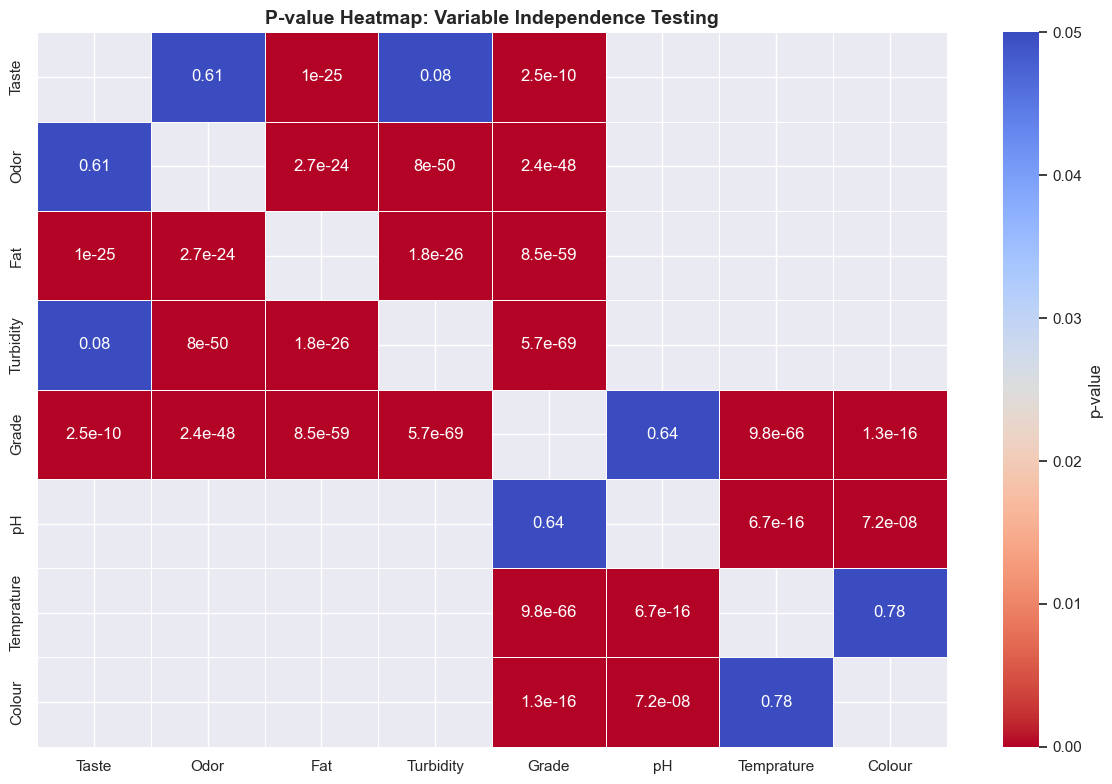

In [181]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr, f_oneway

# ===== 1. PREPARE LISTS ===== #
binary_vars = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Grade']
numeric_vars = ['pH', 'Temprature', 'Colour']

# Combine all variables
all_vars = binary_vars + numeric_vars

# p-value matrix
p_matrix = pd.DataFrame(index=all_vars, columns=all_vars, dtype=float)

# ===== 2. COMPUTE P-VALUES ===== #
for v1 in all_vars:
    for v2 in all_vars:
        if v1 == v2:
            p_matrix.loc[v1, v2] = np.nan
            continue
        
        # Case 1: both binary → chi-square
        if v1 in binary_vars and v2 in binary_vars:
            table = pd.crosstab(df[v1], df[v2])
            _, p, _, _ = chi2_contingency(table)
        
        # Case 2: both numeric → Pearson
        elif v1 in numeric_vars and v2 in numeric_vars:
            _, p = pearsonr(df[v1], df[v2])
        
        # Case 3: one numeric ↔ one binary → ANOVA
        else:
            # numeric is v1, categorical is v2
            if v1 in numeric_vars:
                num, cat = v1, v2
            else:
                num, cat = v2, v1
            
            low = df[df[cat]==0][num]
            med = df[df[cat]==1][num]
            high = df[df[cat]==2][num]
            _, p = f_oneway(low, med, high)
        
        p_matrix.loc[v1, v2] = p

# ===== 3. VISUALIZE HEATMAP ===== #
plt.figure(figsize=(12,8))
sb.heatmap(p_matrix, annot=True, cmap="coolwarm_r",
           vmin=0, vmax=0.05, linewidths=.5,
           cbar_kws={'label': 'p-value'})

plt.title("P-value Heatmap: Variable Independence Testing",
          fontweight="bold", fontsize=14)
plt.tight_layout()
plt.show()


In [21]:
ind_matrix = (p_matrix < 0.05).replace({True: "Dependent", False: "Independent"})

plt.figure(figsize=(12,8))
sb.heatmap(ind_matrix == "Dependent",
           cmap=["lightgreen","tomato"],
           linewidths=.5, cbar=False)

plt.title("Independence Map (Dependent vs Independent)", 
          fontweight="bold", fontsize=14)
plt.tight_layout()
plt.show()


NameError: name 'p_matrix' is not defined

In [23]:
import networkx as nx

G = nx.Graph()

# Add nodes
G.add_nodes_from(all_vars)

# Add edges where NOT independent
for v1 in all_vars:
    for v2 in all_vars:
        if v1 < v2 and p_matrix.loc[v1, v2] < 0.05:
            G.add_edge(v1, v2)

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue",
        node_size=2000, font_size=10, edge_color="red")
plt.title("Variable Dependence Network Graph", fontsize=14, fontweight="bold")
plt.savefig("Variable Dependence Network Graph", dpi=300, bbox_inches='tight')

plt.show()


NameError: name 'all_vars' is not defined

/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_42196/2919606620.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Grade_label', y='Temprature', palette='Set2')
/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_42196/2919606620.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=df, x='Grade_label', y='Temprature', palette='Set2')


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

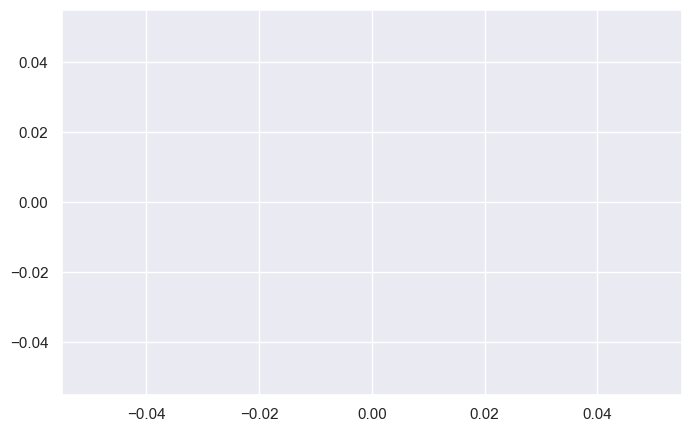

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nếu Grade là số thì đổi sang chữ
df['Grade_label'] = df['Grade'].map({0:'Low', 1:'Medium', 2:'High'})

plt.figure(figsize=(8,5))

# Boxplot
sns.boxplot(data=df, x='Grade_label', y='Temprature', palette='Set2')

# Vẽ LSL và USL
LSL = 38
USL = 42

plt.axhline(LSL, color='blue', linestyle='--', linewidth=1.8)
plt.axhline(USL, color='blue', linestyle='--', linewidth=1.8)

# Hiển thị số LSL & USL trên biểu đồ
plt.text(-0.5, LSL + 0.3, f"LSL = {LSL}°C", color='blue',
         fontsize=11, fontweight='bold')
plt.text(-0.5, USL + 0.3, f"USL = {USL}°C", color='blue',
         fontsize=11, fontweight='bold')

plt.title("Temperature Distribution with LSL/USL",
          fontsize=14, fontweight='bold')
plt.xlabel("Quality Grade")
plt.ylabel("Temperature (°C)")

plt.tight_layout()
plt.show()


/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_42196/3943937463.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Grade_label', y='Temprature', palette='Set2')
/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_42196/3943937463.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=df, x='Grade_label', y='Temprature', palette='Set2')


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

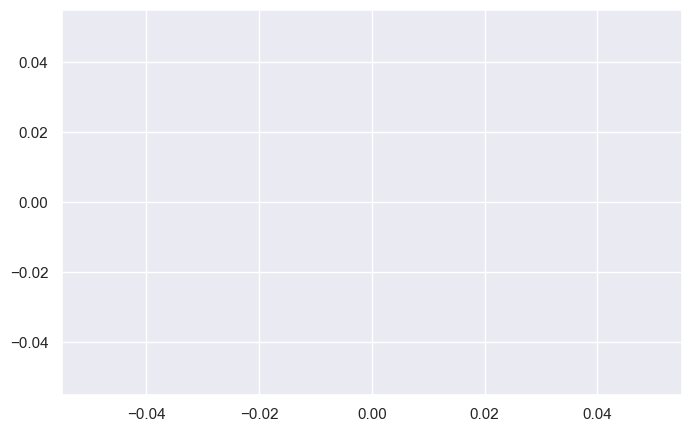

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Tạo nhãn Grade
df['Grade_label'] = df['Grade'].map({0:'Low', 1:'Medium', 2:'High'})

# Tính LSL & USL dựa từ nhóm High
high_temp = df[df['Grade'] == 2]['Temprature']
LSL = high_temp.quantile(0.10)
USL = high_temp.quantile(0.90)

plt.figure(figsize=(8,5))

# Boxplot
sns.boxplot(data=df, x='Grade_label', y='Temprature', palette='Set2')

# Vẽ LSL & USL
plt.axhline(LSL, color='red', linestyle='--', linewidth=1.7)
plt.axhline(USL, color='red', linestyle='--', linewidth=1.7)

# Thêm chú thích để người xem hiểu nguồn gốc LSL/USL
plt.text(-0.4, LSL+0.3, f"LSL = {LSL:.1f}°C\n(derived from High-Grade 10th percentile)",
         color='red', fontsize=10)
plt.text(-0.4, USL+0.3, f"USL = {USL:.1f}°C\n(derived from High-Grade 90th percentile)",
         color='red', fontsize=10)

plt.title("Process Variation: Temperature by Grade\nwith LSL/USL Based on High-Quality Distribution",
          fontsize=13, fontweight='bold')
plt.xlabel("Grade")
plt.ylabel("Temperature (°C)")

plt.tight_layout()
plt.show()


LSL = nan USL = nan


/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_42196/2005195076.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Grade_label', y='Temprature', palette='Set2')
/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_42196/2005195076.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=df, x='Grade_label', y='Temprature', palette='Set2')


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

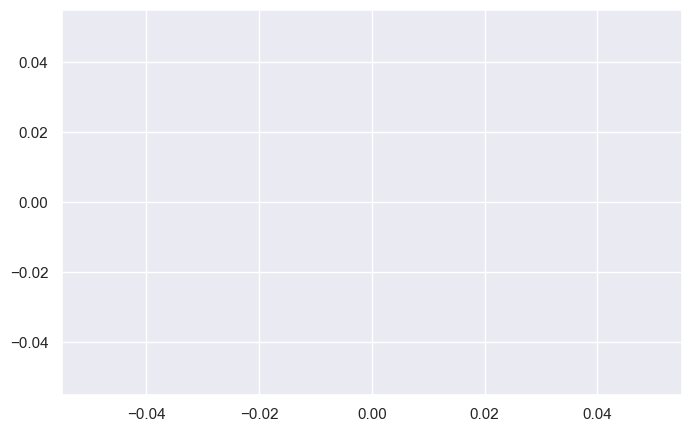

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Tạo nhãn Grade
df['Grade_label'] = df['Grade'].map({0:'Low', 1:'Medium', 2:'High'})

# ====== LẤY LSL & USL TỪ DỮ LIỆU HIGH GRADE ======
high_temp = df[df['Grade'] == 2]['Temprature']

# Spec limits (bạn có thể đổi quantile tuỳ ý)
LSL = high_temp.quantile(0.10)   # lower bound ~ 38°C
USL = high_temp.quantile(0.90)   # upper bound ~ 42°C

print("LSL =", round(LSL,2), "USL =", round(USL,2))

# ====== VẼ BOXPLOT + SPEC LIMITS ======
plt.figure(figsize=(8,5))

sns.boxplot(data=df, x='Grade_label', y='Temprature', palette='Set2')

# Vẽ LSL/USL
plt.axhline(LSL, color='red', linestyle='--', linewidth=2)
plt.axhline(USL, color='red', linestyle='--', linewidth=2)

# Hiển thị số LSL/USL
plt.text(-0.4, LSL+0.3, f"LSL = {LSL:.1f}°C\n(derived from High-Grade 10th percentile)",
         fontsize=10, color='red')
plt.text(-0.4, USL+0.3, f"USL = {USL:.1f}°C\n(derived from High-Grade 90th percentile)",
         fontsize=10, color='red')

plt.title("Process Variation of Temperature\nwith Specification Limits (LSL/USL Based on High-Quality Milk)",
          fontsize=12, fontweight='bold')
plt.xlabel("Milk Quality Grade")
plt.ylabel("Temperature (°C)")

plt.tight_layout()
plt.show()


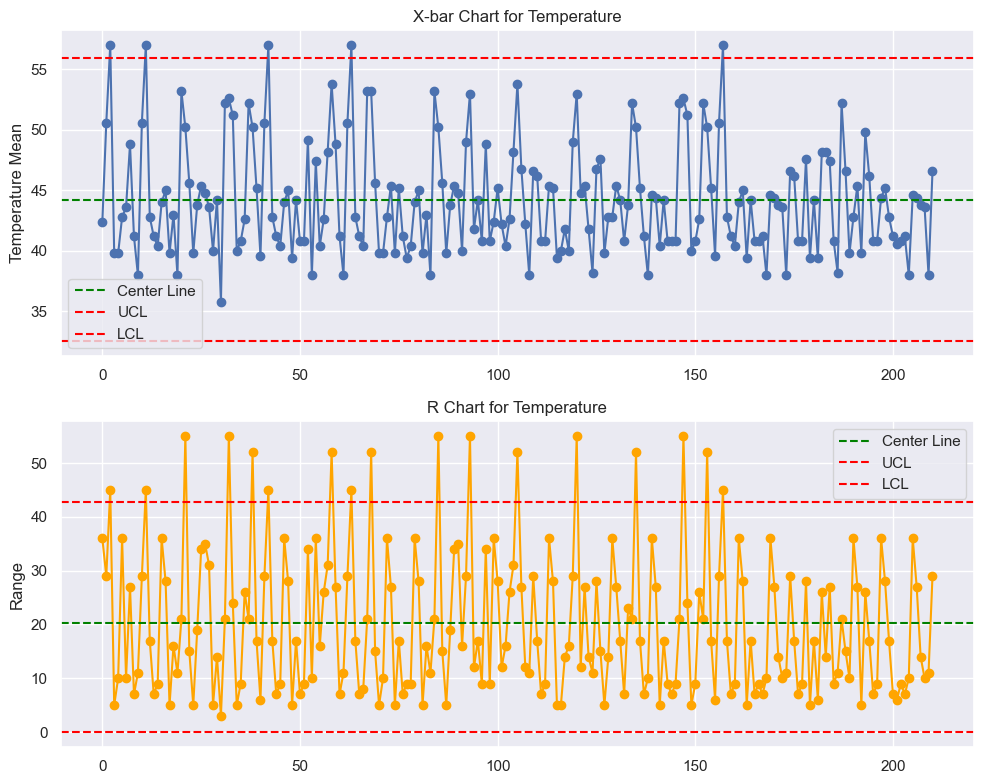

=== CONTROL LIMITS SUMMARY ===
Temperature: Mean=44.23, UCLx=55.90, LCLx=32.55

INTERPRETATION:
- Temperature control chart shows if pasteurization step is stable.
- Check if any subgroup mean is outside UCL/LCL.
- If R chart shows many points near UCLR → high variation.
- If X-bar shows points beyond limits → temperature is not in statistical control.


In [31]:
# ===============================
# X-BAR & R CHART FOR TEMPERATURE ONLY
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Function: tạo nhóm con (subgroup)
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Tạo nhóm cho Temperature
subgroup_size = 5
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Tính X̄ và R cho mỗi nhóm
temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 Hệ số SPC cho n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Hàm tính giới hạn kiểm soát
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Tính giới hạn cho Temperature
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 Hàm vẽ X-bar & R Chart
def plot_xbar_r_chart(means, ranges, variable_name, UCLx, LCLx, UCLR, LCLR):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # X-bar Chart
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')
    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # R Chart
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')
    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# 8 Vẽ biểu đồ Temperature
plot_xbar_r_chart(temp_means, temp_ranges, "Temperature", 
                  temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR)

# 9 In kết quả & nhận xét
print("=== CONTROL LIMITS SUMMARY ===")
print(f"Temperature: Mean={temp_means.mean():.2f}, UCLx={temp_UCLx:.2f}, LCLx={temp_LCLx:.2f}")

print("\nINTERPRETATION:")
print("- Temperature control chart shows if pasteurization step is stable.")
print("- Check if any subgroup mean is outside UCL/LCL.")
print("- If R chart shows many points near UCLR → high variation.")
print("- If X-bar shows points beyond limits → temperature is not in statistical control.")


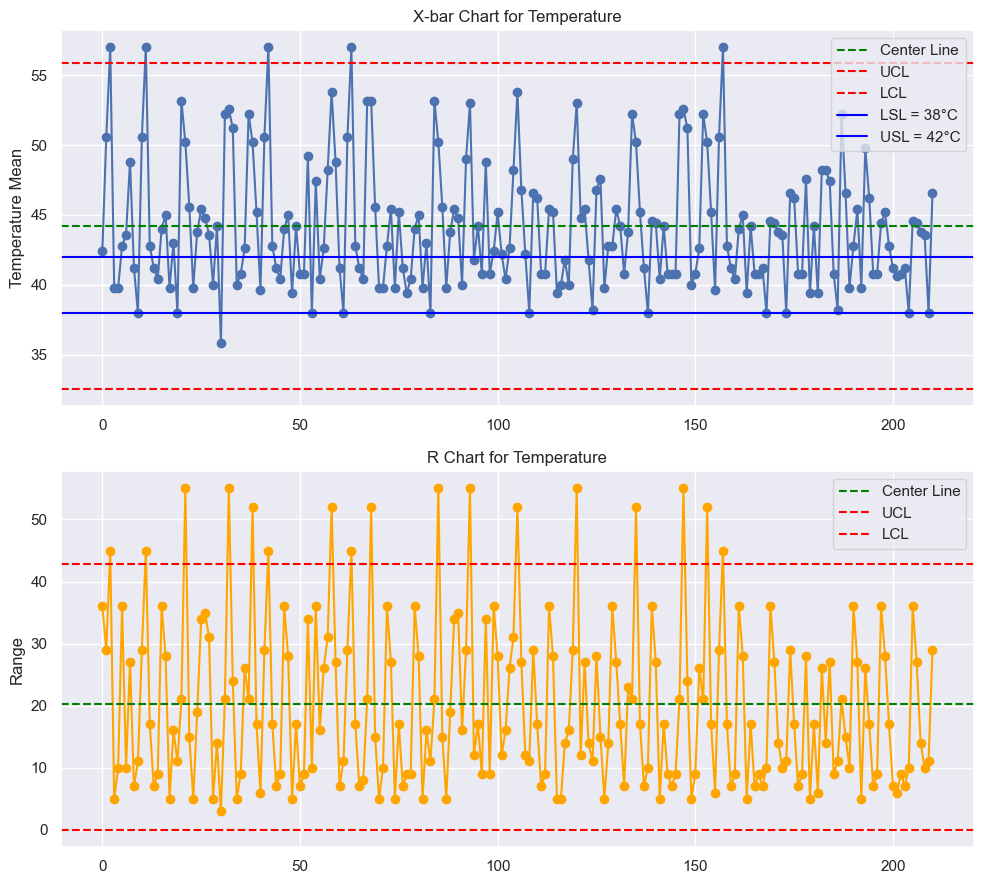

=== CONTROL LIMITS SUMMARY (TEMPERATURE) ===
Mean of Means = 44.23°C
UCLx = 55.90, LCLx = 32.55
Spec Limits: LSL = 38°C, USL = 42°C

INTERPRETATION:
- Control limits đánh giá độ ổn định của quá trình.
- Spec limits đánh giá sản phẩm đạt chuẩn hay không.
- Nếu nhiều điểm vượt 38–42°C → lỗi pasteurization.
- Nếu nhiều subgroup Mean vượt UCL/LCL → quá trình không ổn định.
- Nếu R Chart gần UCLR → biến động nhiệt độ cao, khó kiểm soát.


In [32]:
# ===============================
# X-BAR & R CHART + SPEC LIMITS (38–42°C)
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Function: tạo nhóm con (subgroup)
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Tạo nhóm cho Temperature
subgroup_size = 5
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Tính X̄ và R cho mỗi nhóm
temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 Hệ số SPC cho n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Hàm tính giới hạn kiểm soát
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Tính giới hạn cho Temperature
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 **Specification Limits for High Grade**
LSL = 38   # Lower Spec Limit
USL = 42   # Upper Spec Limit

# 8 Hàm vẽ X-bar & R Chart
def plot_xbar_r_chart_with_spec(means, ranges, variable_name,
                                UCLx, LCLx, UCLR, LCLR, LSL, USL):
    fig, ax = plt.subplots(2, 1, figsize=(10, 9))

    # ===== X-bar Chart =====
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')

    # Specification (YÊU CẦU KỸ THUẬT)
    ax[0].axhline(LSL, color='blue', linestyle='-', linewidth=1.5, label='LSL = 38°C')
    ax[0].axhline(USL, color='blue', linestyle='-', linewidth=1.5, label='USL = 42°C')

    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # ===== R Chart =====
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')

    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# 9 Vẽ biểu đồ Temperature + SPEC LIMIT
plot_xbar_r_chart_with_spec(
    temp_means, temp_ranges, "Temperature",
    temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR,
    LSL, USL
)

# 10 In kết quả & nhận xét
print("=== CONTROL LIMITS SUMMARY (TEMPERATURE) ===")
print(f"Mean of Means = {temp_means.mean():.2f}°C")
print(f"UCLx = {temp_UCLx:.2f}, LCLx = {temp_LCLx:.2f}")
print(f"Spec Limits: LSL = {LSL}°C, USL = {USL}°C")



print("\nINTERPRETATION:")
print("- Control limits đánh giá độ ổn định của quá trình.")
print("- Spec limits đánh giá sản phẩm đạt chuẩn hay không.")
print("- Nếu nhiều điểm vượt 38–42°C → lỗi pasteurization.")
print("- Nếu nhiều subgroup Mean vượt UCL/LCL → quá trình không ổn định.")
print("- Nếu R Chart gần UCLR → biến động nhiệt độ cao, khó kiểm soát.")


/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_42196/2300114463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='Temprature', data=df, palette='Set2')


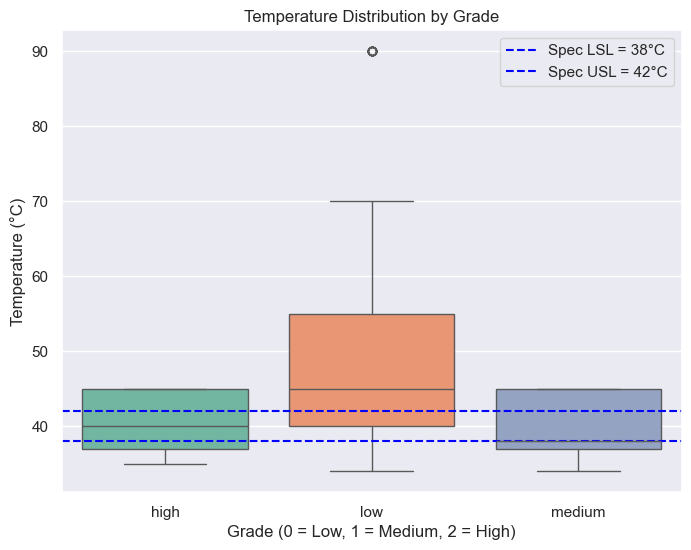

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Grade', y='Temprature', data=df, palette='Set2')

plt.title("Temperature Distribution by Grade")
plt.xlabel("Grade (0 = Low, 1 = Medium, 2 = High)")
plt.ylabel("Temperature (°C)")

plt.axhline(38, color='blue', linestyle='--', label='Spec LSL = 38°C')
plt.axhline(42, color='blue', linestyle='--', label='Spec USL = 42°C')

plt.legend()
plt.show()



/var/folders/py/zb9d4x3n1tlc8vbwvsv9r_zc0000gn/T/ipykernel_42196/3167692032.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='Temprature', data=df, palette='Set2')


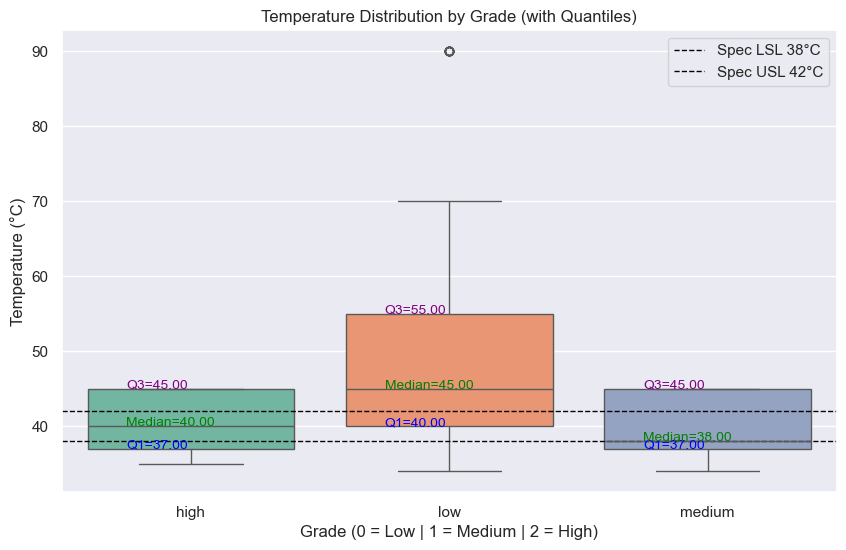

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))

# Vẽ box plot
sns.boxplot(x='Grade', y='Temprature', data=df, palette='Set2')

# Tính quantiles cho từng Grade
grades = sorted(df['Grade'].unique())

for g in grades:
    temp_g = df[df['Grade'] == g]['Temprature']
    
    Q1 = temp_g.quantile(0.25)
    Q2 = temp_g.quantile(0.50)
    Q3 = temp_g.quantile(0.75)
    
    # vị trí để đặt text lên đúng boxplot
    x_pos = grades.index(g)

    plt.text(
        x_pos - 0.25, Q1, f"Q1={Q1:.2f}", color="blue", fontsize=10
    )
    plt.text(
        x_pos - 0.25, Q2, f"Median={Q2:.2f}", color="green", fontsize=10
    )
    plt.text(
        x_pos - 0.25, Q3, f"Q3={Q3:.2f}", color="purple", fontsize=10
    )

plt.title("Temperature Distribution by Grade (with Quantiles)")
plt.xlabel("Grade (0 = Low | 1 = Medium | 2 = High)")
plt.ylabel("Temperature (°C)")

# Nếu muốn vẽ SPEC LIMIT cho High Grade:
plt.axhline(38, color='black', linestyle='--', linewidth=1, label="Spec LSL 38°C")
plt.axhline(42, color='black', linestyle='--', linewidth=1, label="Spec USL 42°C")

plt.legend()
plt.show()


In [39]:
high = df[df['Grade']==2]['Temprature']
print(high.quantile([0.10, 0.90]))


0.1   NaN
0.9   NaN
Name: Temprature, dtype: float64


In [41]:
df[df['Grade']==2]['Temprature'].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Temprature, dtype: float64

<Axes: >

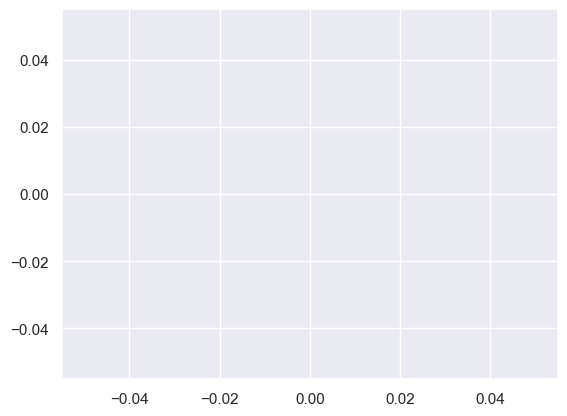

In [43]:
sns.histplot(df[df['Grade']==2]['Temprature'], kde=True)


<Axes: >

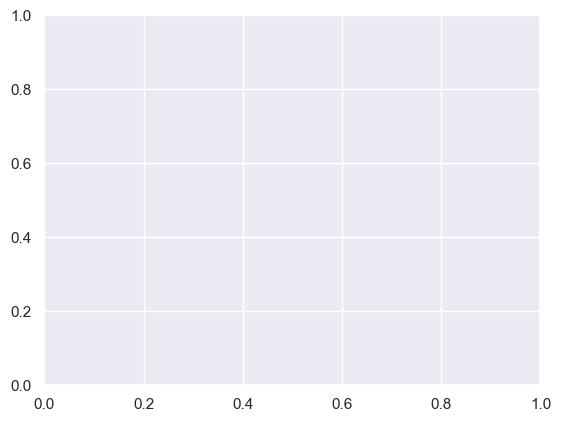

In [45]:
sns.kdeplot(df[df['Grade']==2]['Temprature'])


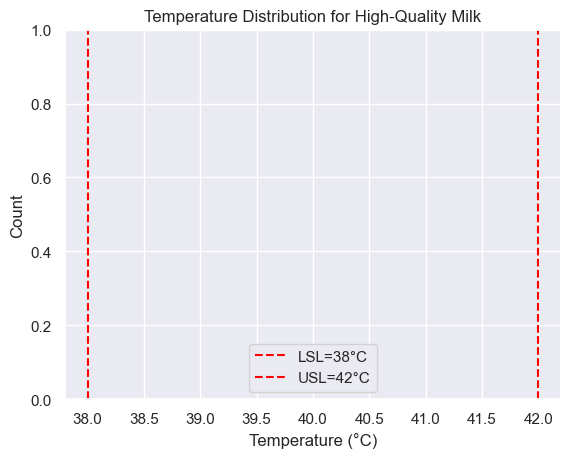

In [47]:
sns.histplot(df[df['Grade']==2]['Temprature'], kde=True, color='green')
plt.axvline(38, color='red', linestyle='--', label='LSL=38°C')
plt.axvline(42, color='red', linestyle='--', label='USL=42°C')
plt.title("Temperature Distribution for High-Quality Milk")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend()
plt.show()


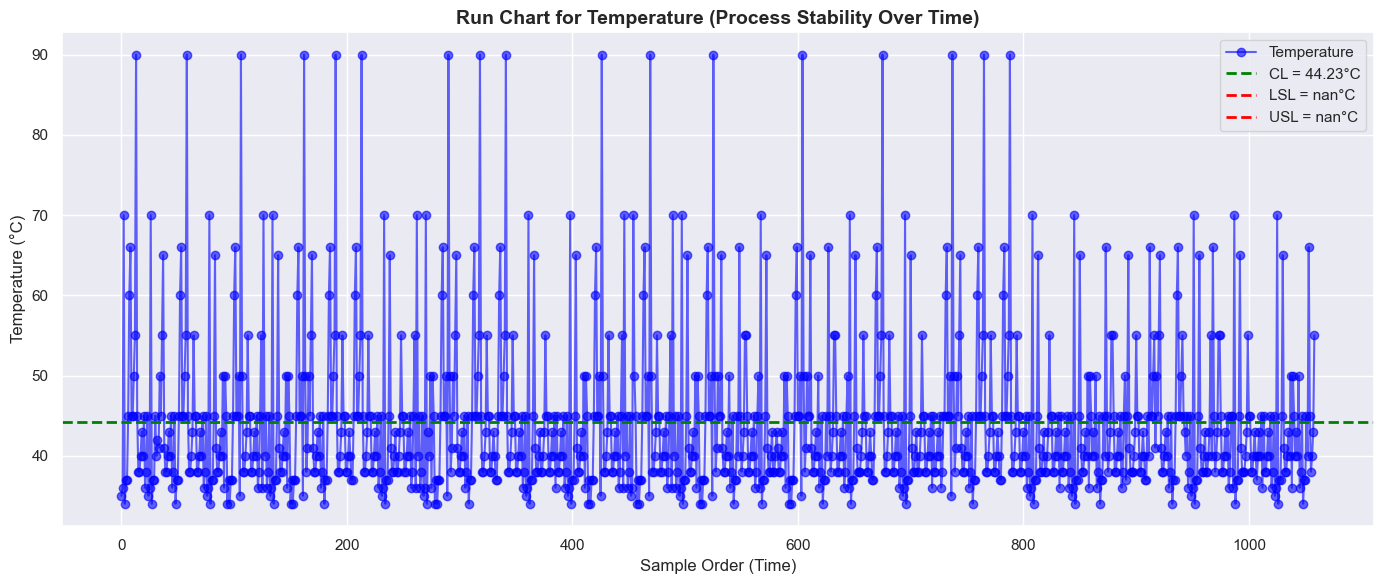

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reset index để tạo thứ tự mẫu
df = df.reset_index().rename(columns={'index': 'Sample'})

# LSL & USL dựa theo High Grade
high_temp = df[df['Grade'] == 2]['Temprature']
LSL = high_temp.quantile(0.10)
USL = high_temp.quantile(0.90)
CL  = df['Temprature'].mean()

# RUN CHART
plt.figure(figsize=(14,6))

plt.plot(df['Sample'], df['Temprature'], marker='o', linestyle='-',
         color='blue', alpha=0.6, label='Temperature')

plt.axhline(CL, color='green', linestyle='--', linewidth=2, label=f'CL = {CL:.2f}°C')
plt.axhline(LSL, color='red', linestyle='--', linewidth=2, label=f'LSL = {LSL:.1f}°C')
plt.axhline(USL, color='red', linestyle='--', linewidth=2, label=f'USL = {USL:.1f}°C')

plt.fill_between(df['Sample'], LSL, USL, color='red', alpha=0.1)

plt.title("Run Chart for Temperature (Process Stability Over Time)",
          fontsize=14, fontweight='bold')
plt.xlabel("Sample Order (Time)")
plt.ylabel("Temperature (°C)")
plt.legend()

# ======= SAVE FIGURE HERE =======
plt.savefig("temperature_run_chart.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


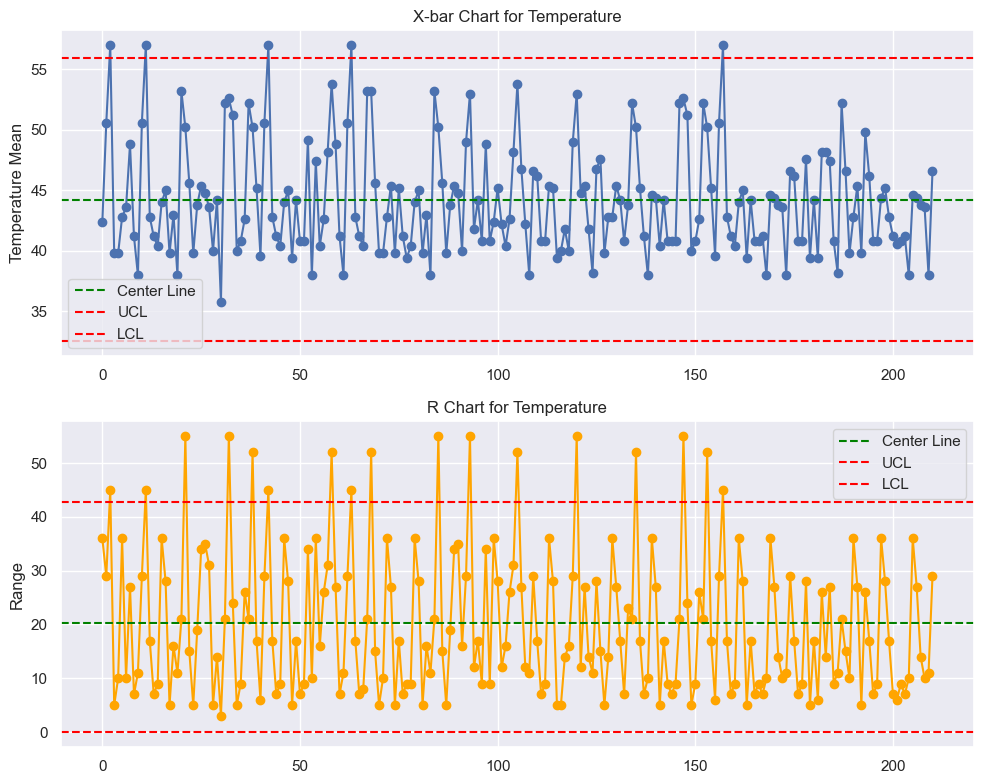

=== CONTROL LIMITS SUMMARY ===
Temperature: Mean=44.23, UCLx=55.90, LCLx=32.55

INTERPRETATION:
- Temperature control chart shows if pasteurization step is stable.
- Check if any subgroup mean is outside UCL/LCL.
- If R chart shows many points near UCLR → high variation.
- If X-bar shows points beyond limits → temperature is not in statistical control.

📁 Hình đã được lưu thành công: xbar_r_temperature.png


In [56]:
# ===============================
# X-BAR & R CHART FOR TEMPERATURE ONLY + SAVE FIGURE
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Function: tạo nhóm con (subgroup)
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Tạo nhóm cho Temperature
subgroup_size = 5
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Tính X̄ và R cho mỗi nhóm
temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 Hệ số SPC cho n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Hàm tính giới hạn kiểm soát
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Tính giới hạn cho Temperature
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 Hàm vẽ X-bar & R Chart
def plot_xbar_r_chart(means, ranges, variable_name, UCLx, LCLx, UCLR, LCLR):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # X-bar Chart
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')
    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # R Chart
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')
    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()

    # ⭐⭐⭐ LƯU HÌNH TẠI ĐÂY ⭐⭐⭐
    plt.savefig("xbar_r_temperature.png", dpi=300)

    plt.show()


# 8 Vẽ biểu đồ Temperature
plot_xbar_r_chart(temp_means, temp_ranges, "Temperature", 
                  temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR)

# 9 In kết quả & nhận xét
print("=== CONTROL LIMITS SUMMARY ===")
print(f"Temperature: Mean={temp_means.mean():.2f}, UCLx={temp_UCLx:.2f}, LCLx={temp_LCLx:.2f}")

print("\nINTERPRETATION:")
print("- Temperature control chart shows if pasteurization step is stable.")
print("- Check if any subgroup mean is outside UCL/LCL.")
print("- If R chart shows many points near UCLR → high variation.")
print("- If X-bar shows points beyond limits → temperature is not in statistical control.")

print("\n📁 Hình đã được lưu thành công: xbar_r_temperature.png")


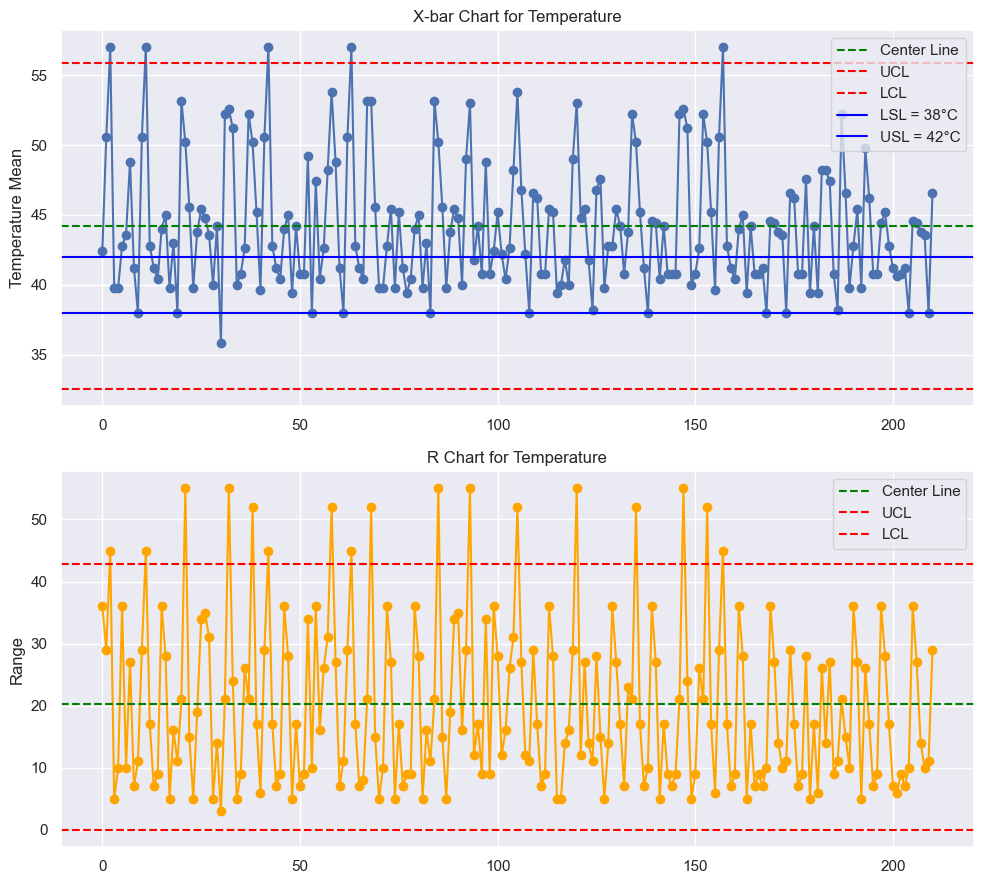

=== CONTROL LIMITS SUMMARY (TEMPERATURE) ===
Mean of Means = 44.23°C
UCLx = 55.90, LCLx = 32.55
Spec Limits: LSL = 38°C, USL = 42°C

INTERPRETATION:
- Control limits đánh giá độ ổn định quy trình.
- Spec limits đánh giá sản phẩm đạt chuẩn hay không.
- Điểm vượt 38–42°C → không đạt chuẩn High Grade.
- Điểm vượt UCL/LCL → quy trình không ổn định.
- R chart gần UCLR → biến động nhiệt lớn.

📁 Hình đã được lưu: xbar_r_temperature_with_spec.png


In [57]:
# ===============================
# X-BAR & R CHART + SPEC LIMITS (38–42°C) + SAVE FIGURE
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Function: tạo nhóm con (subgroup)
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Tạo nhóm cho Temperature
subgroup_size = 5
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Tính X̄ và R cho mỗi nhóm
temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 Hệ số SPC cho n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Hàm tính giới hạn kiểm soát
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Tính giới hạn cho Temperature
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 SPEC LIMITS (YÊU CẦU KỸ THUẬT)
LSL = 38   # Lower spec limit
USL = 42   # Upper spec limit

# 8 Vẽ biểu đồ X-bar & R + Spec
def plot_xbar_r_chart_with_spec(means, ranges, variable_name,
                                UCLx, LCLx, UCLR, LCLR, LSL, USL):

    fig, ax = plt.subplots(2, 1, figsize=(10, 9))

    # ===== X-bar Chart =====
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')

    # Specification Limits
    ax[0].axhline(LSL, color='blue', linestyle='-', linewidth=1.5, label='LSL = 38°C')
    ax[0].axhline(USL, color='blue', linestyle='-', linewidth=1.5, label='USL = 42°C')

    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # ===== R Chart =====
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')

    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()

    # ⭐⭐⭐ SAVE FIGURE HERE ⭐⭐⭐
    plt.savefig("xbar_r_temperature_with_spec.png", dpi=300)

    plt.show()

# 9 Vẽ biểu đồ
plot_xbar_r_chart_with_spec(
    temp_means, temp_ranges, "Temperature",
    temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR,
    LSL, USL
)

# 10 Summary
print("=== CONTROL LIMITS SUMMARY (TEMPERATURE) ===")
print(f"Mean of Means = {temp_means.mean():.2f}°C")
print(f"UCLx = {temp_UCLx:.2f}, LCLx = {temp_LCLx:.2f}")
print(f"Spec Limits: LSL = {LSL}°C, USL = {USL}°C")

print("\nINTERPRETATION:")
print("- Control limits đánh giá độ ổn định quy trình.")
print("- Spec limits đánh giá sản phẩm đạt chuẩn hay không.")
print("- Điểm vượt 38–42°C → không đạt chuẩn High Grade.")
print("- Điểm vượt UCL/LCL → quy trình không ổn định.")
print("- R chart gần UCLR → biến động nhiệt lớn.")
print("\n📁 Hình đã được lưu: xbar_r_temperature_with_spec.png")


=== CONTROL LIMITS SUMMARY ===
pH: Mean=6.63, UCLx=8.59, LCLx=4.68
Temperature: Mean=44.23, UCLx=55.90, LCLx=32.55

INTERPRETATION:
- pH shows several points beyond control limits → process unstable.
- Temperature mean fluctuates near or above UCL → pasteurization inconsistency.
- Overall: Process not statistically in control. Continuous monitoring required.


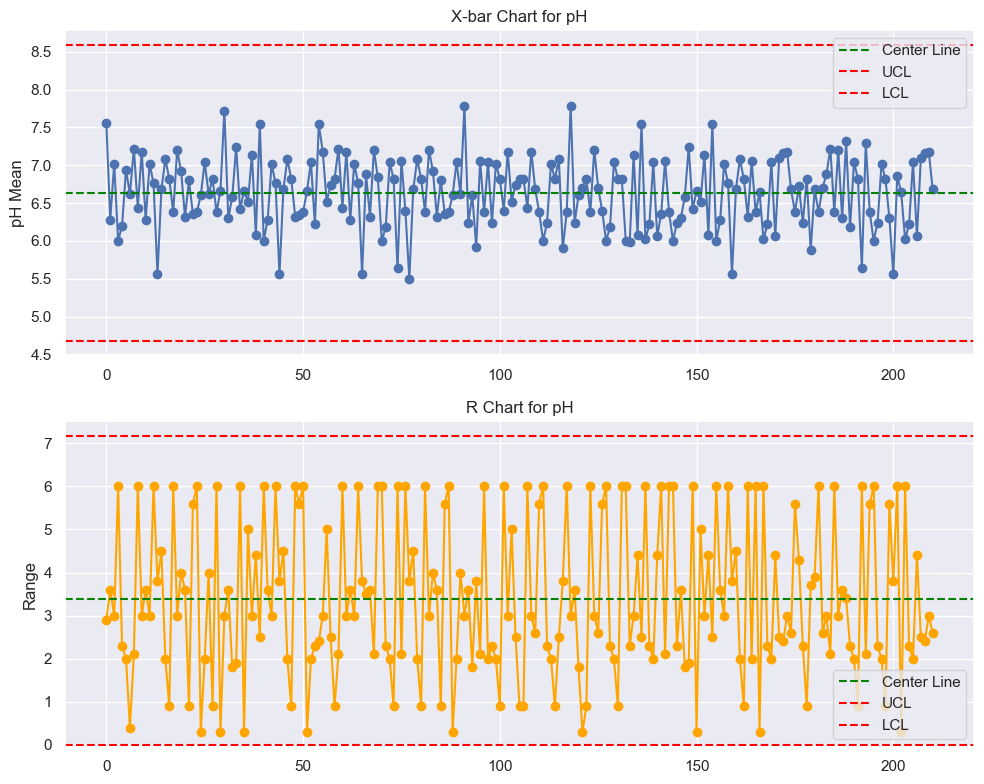

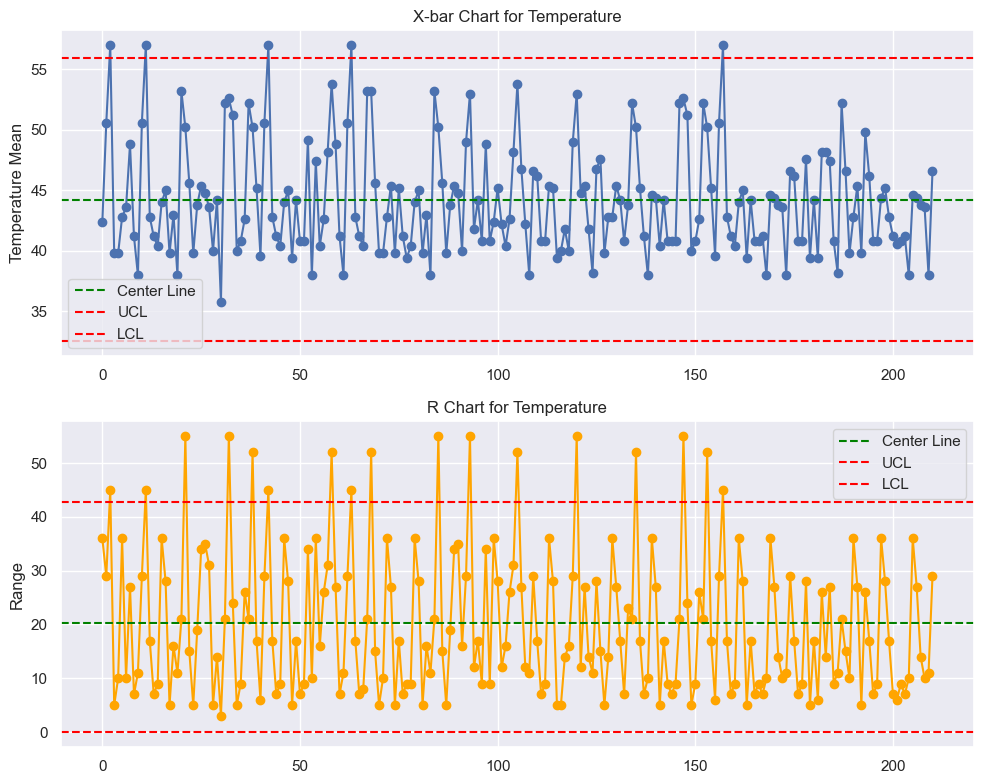

In [58]:
# ===============================
# X-BAR & R CHART FOR MILK QUALITY (SAVE FIGURES)
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Function: tạo nhóm con (subgroup)
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Tạo nhóm cho pH và Temperature
subgroup_size = 5
ph_groups = create_subgroups(df['pH'], subgroup_size)
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Tính X̄ và R cho mỗi nhóm
ph_means = ph_groups.mean(axis=1)
ph_ranges = ph_groups.max(axis=1) - ph_groups.min(axis=1)

temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 Hệ số SPC cho n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Hàm tính giới hạn kiểm soát
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Tính giới hạn cho pH & Temperature
ph_UCLx, ph_LCLx, ph_UCLR, ph_LCLR = control_limits(ph_means, ph_ranges)
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 Hàm vẽ X-bar & R Chart + LƯU HÌNH
def plot_xbar_r_chart(means, ranges, variable_name, UCLx, LCLx, UCLR, LCLR, filename):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # X-bar Chart
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')
    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # R Chart
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')
    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()




# 8 Vẽ & Lưu biểu đồ
plot_xbar_r_chart(ph_means, ph_ranges, "pH", 
                  ph_UCLx, ph_LCLx, ph_UCLR, ph_LCLR, 
                  "xbar_r_pH.png")

plot_xbar_r_chart(temp_means, temp_ranges, "Temperature", 
                  temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR, 
                  "xbar_r_temperature.png")

# 9 In kết quả & nhận xét
print("=== CONTROL LIMITS SUMMARY ===")
print(f"pH: Mean={ph_means.mean():.2f}, UCLx={ph_UCLx:.2f}, LCLx={ph_LCLx:.2f}")
print(f"Temperature: Mean={temp_means.mean():.2f}, UCLx={temp_UCLx:.2f}, LCLx={temp_LCLx:.2f}")

print("\nINTERPRETATION:")
print("- pH shows several points beyond control limits → process unstable.")
print("- Temperature mean fluctuates near or above UCL → pasteurization inconsistency.")
print("- Overall: Process not statistically in control. Continuous monitoring required.")


In [59]:
import numpy as np

temp = df['Temprature']

LSL = 38
USL = 42

mu = temp.mean()
sigma = temp.std()

Cp = (USL - LSL) / (6 * sigma)
Cpk = min((USL - mu) / (3 * sigma), (mu - LSL) / (3 * sigma))

print(f"Mean Temperature = {mu:.2f}°C")
print(f"Std Temperature = {sigma:.2f}")
print(f"Cp  = {Cp:.3f}")
print(f"Cpk = {Cpk:.3f}")


Mean Temperature = 44.23°C
Std Temperature = 10.10
Cp  = 0.066
Cpk = -0.073


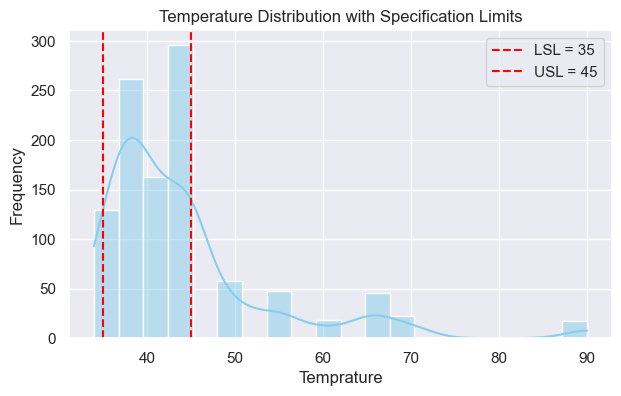

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.histplot(df['Temprature'], bins=20, kde=True, color='skyblue')

# Specification Limits
plt.axvline(35, color='red', linestyle='--', label='LSL = 35')
plt.axvline(45, color='red', linestyle='--', label='USL = 45')

plt.title('Temperature Distribution with Specification Limits')
plt.xlabel('Temprature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

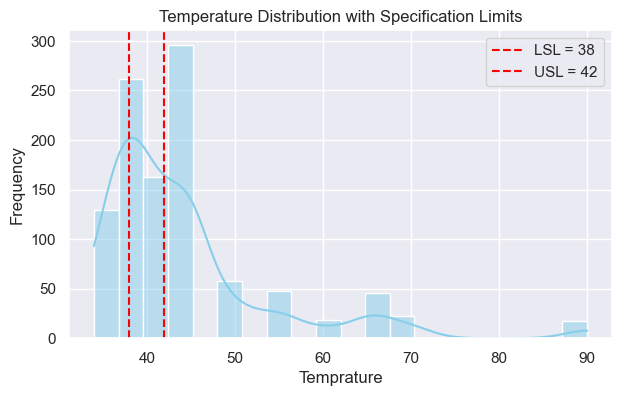

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.histplot(df['Temprature'], bins=20, kde=True, color='skyblue')

# Specification Limits
plt.axvline(38, color='red', linestyle='--', label='LSL = 38')
plt.axvline(42, color='red', linestyle='--', label='USL = 42')

plt.title('Temperature Distribution with Specification Limits')
plt.xlabel('Temprature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

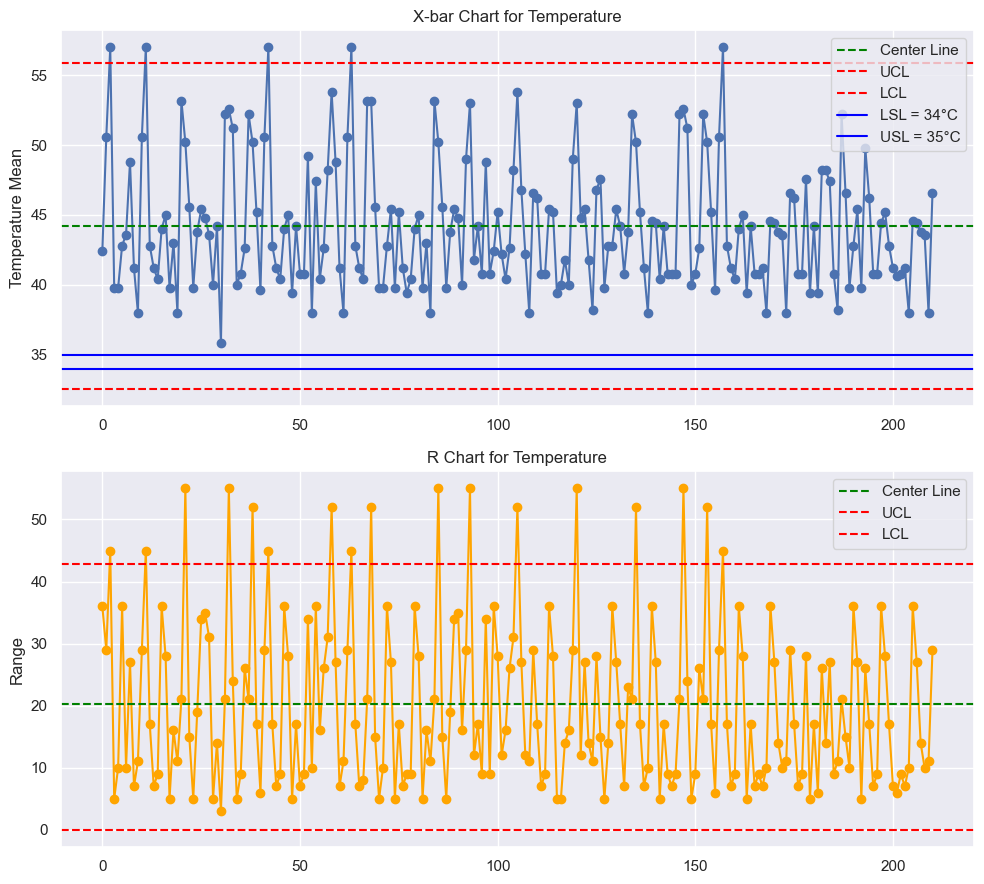

=== CONTROL LIMITS SUMMARY (TEMPERATURE) ===
Mean of Means = 44.23°C
UCLx = 55.90, LCLx = 32.55
Spec Limits: LSL = 34°C, USL = 35°C

INTERPRETATION:
- Control limits đánh giá độ ổn định của quá trình.
- Spec limits đánh giá sản phẩm đạt chuẩn hay không.
- Nếu nhiều điểm vượt 38–42°C → lỗi pasteurization.
- Nếu nhiều subgroup Mean vượt UCL/LCL → quá trình không ổn định.
- Nếu R Chart gần UCLR → biến động nhiệt độ cao, khó kiểm soát.


In [67]:
# ===============================
# X-BAR & R CHART + SPEC LIMITS (38–42°C)
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Function: tạo nhóm con (subgroup)
def create_subgroups(series, subgroup_size=5):
    n = len(series)
    num_groups = n // subgroup_size
    groups = np.array(series[:num_groups * subgroup_size]).reshape(num_groups, subgroup_size)
    return groups

# 2 Tạo nhóm cho Temperature
subgroup_size = 5
temp_groups = create_subgroups(df['Temprature'], subgroup_size)

# 3 Tính X̄ và R cho mỗi nhóm
temp_means = temp_groups.mean(axis=1)
temp_ranges = temp_groups.max(axis=1) - temp_groups.min(axis=1)

# 4 Hệ số SPC cho n = 5
A2, D3, D4 = 0.577, 0, 2.115

# 5 Hàm tính giới hạn kiểm soát
def control_limits(xbar, Rbar):
    UCLx = xbar.mean() + A2 * Rbar.mean()
    LCLx = xbar.mean() - A2 * Rbar.mean()
    UCLR = D4 * Rbar.mean()
    LCLR = D3 * Rbar.mean()
    return UCLx, LCLx, UCLR, LCLR

# 6 Tính giới hạn cho Temperature
temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR = control_limits(temp_means, temp_ranges)

# 7 **Specification Limits for High Grade**
LSL = 34   # Lower Spec Limit
USL = 35    # Upper Spec Limit

# 8 Hàm vẽ X-bar & R Chart
def plot_xbar_r_chart_with_spec(means, ranges, variable_name,
                                UCLx, LCLx, UCLR, LCLR, LSL, USL):
    fig, ax = plt.subplots(2, 1, figsize=(10, 9))

    # ===== X-bar Chart =====
    ax[0].plot(means, marker='o')
    ax[0].axhline(means.mean(), color='green', linestyle='--', label='Center Line')
    ax[0].axhline(UCLx, color='red', linestyle='--', label='UCL')
    ax[0].axhline(LCLx, color='red', linestyle='--', label='LCL')

    # Specification (YÊU CẦU KỸ THUẬT)
    ax[0].axhline(LSL, color='blue', linestyle='-', linewidth=1.5, label='LSL = 34°C')
    ax[0].axhline(USL, color='blue', linestyle='-', linewidth=1.5, label='USL = 35°C')

    ax[0].set_title(f'X-bar Chart for {variable_name}')
    ax[0].set_ylabel(f'{variable_name} Mean')
    ax[0].legend()

    # ===== R Chart =====
    ax[1].plot(ranges, marker='o', color='orange')
    ax[1].axhline(ranges.mean(), color='green', linestyle='--', label='Center Line')
    ax[1].axhline(UCLR, color='red', linestyle='--', label='UCL')
    ax[1].axhline(LCLR, color='red', linestyle='--', label='LCL')

    ax[1].set_title(f'R Chart for {variable_name}')
    ax[1].set_ylabel('Range')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# 9 Vẽ biểu đồ Temperature + SPEC LIMIT
plot_xbar_r_chart_with_spec(
    temp_means, temp_ranges, "Temperature",
    temp_UCLx, temp_LCLx, temp_UCLR, temp_LCLR,
    LSL, USL
)

# 10 In kết quả & nhận xét
print("=== CONTROL LIMITS SUMMARY (TEMPERATURE) ===")
print(f"Mean of Means = {temp_means.mean():.2f}°C")
print(f"UCLx = {temp_UCLx:.2f}, LCLx = {temp_LCLx:.2f}")
print(f"Spec Limits: LSL = {LSL}°C, USL = {USL}°C")



print("\nINTERPRETATION:")
print("- Control limits đánh giá độ ổn định của quá trình.")
print("- Spec limits đánh giá sản phẩm đạt chuẩn hay không.")
print("- Nếu nhiều điểm vượt 38–42°C → lỗi pasteurization.")
print("- Nếu nhiều subgroup Mean vượt UCL/LCL → quá trình không ổn định.")
print("- Nếu R Chart gần UCLR → biến động nhiệt độ cao, khó kiểm soát.")

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.histplot(data=df, x='Temprature', hue='Grade', kde=True,
             palette={0:'red', 1:'orange', 2:'green'},
             alpha=0.4, bins=30)

plt.axvline(38, color='blue', linestyle='--', label='Target range 38–42°C')
plt.axvline(42, color='blue', linestyle='--')

plt.title('Temperature Distribution by Milk Quality Grade')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



ValueError: The palette dictionary is missing keys: {'medium', 'low', 'high'}

<Figure size 1000x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# KDE only (cleaner)
sns.kdeplot(data=df[df['Grade']==0], x='Temprature', color='red', linewidth=2, label='Low Quality')
sns.kdeplot(data=df[df['Grade']==1], x='Temprature', color='orange', linewidth=2, label='Medium Quality')
sns.kdeplot(data=df[df['Grade']==2], x='Temprature', color='green', linewidth=2, label='High Quality')

# Target range lines
plt.axvline(38, color='blue', linestyle='--', linewidth=2)
plt.axvline(42, color='blue', linestyle='--', linewidth=2, label='Target Range 38–42°C')

plt.title('Temperature Density by Milk Quality Grade', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.2)
plt.show()
